In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
import random
random.seed(6400)

In [ ]:
data = pd.read_csv("BankChurners.csv")

In [ ]:
# #getting HTML File
%%shell
jupyter nbconvert --to html /content/6400.ipynb

[NbConvertApp] Converting notebook /content/6400.ipynb to html
[NbConvertApp] Writing 4768530 bytes to /content/6400.html


## 1 Data understanding

In [ ]:
data.head()
#Sample of data matrix

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0              39  ...       12691.0                  777          11914.0   
1              44  ...        8256.0                  864           7392.0   
2              36  ...        3418.0                    0           3418.0   
3              34  ...        3313.0                 2517            796.0   
4              21  ...        4716.0                    0           4716.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  \
0                  0.061   
1                  0.105   
2                  0.000   
3                  0.760   
4                  0.000   

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  \
0                                           0.000093                                                                                    
1                                           0.000057                                                                                    
2                                           0.000021                                                                                    
3                                           0.000134                                                                                    
4                                           0.000022                                                                                    

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2  
0                                            0.99991                                                                                   
1                                            0.99994                                                                                   
2                                            0.99998                                                                                   
3                                            0.99987                                                                                   
4                                            0.99998                                                                                   

[5 rows x 23 columns]

We have 10127 Objects and 23 attributes

In [ ]:
data.shape

(10127, 23)

In [ ]:
data.columns
#all attribute names

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [ ]:
data.info()
#types of each attribute can be seen here, object = string

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

## 2 Data Preparation

### 2.1 Feature subset selection Irrelevant Features

Removing Null values

In [ ]:
data.isna().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

Drop unique columns

In [ ]:
data.nunique()

CLIENTNUM                                                                                                                             10127
Attrition_Flag                                                                                                                            2
Customer_Age                                                                                                                             45
Gender                                                                                                                                    2
Dependent_count                                                                                                                           6
Education_Level                                                                                                                           7
Marital_Status                                                                                                                            4
Income_Category     

In [ ]:
data.drop(["CLIENTNUM","Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1","Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"],axis=1,inplace=True)

### 2.2 Feature engineering  Categorical encoding

In [ ]:
#all categorical columns to change:
data_cat=data.select_dtypes(include=['object']).copy()
data_cat.head()

Attrition_Flag Gender Education_Level Marital_Status Income_Category  \
0  Existing Customer      M     High School        Married     $60K - $80K   
1  Existing Customer      F        Graduate         Single  Less than $40K   
2  Existing Customer      M        Graduate        Married    $80K - $120K   
3  Existing Customer      F     High School        Unknown  Less than $40K   
4  Existing Customer      M      Uneducated        Married     $60K - $80K   

  Card_Category  
0          Blue  
1          Blue  
2          Blue  
3          Blue  
4          Blue

In [ ]:
#Binary encoding
data["Attrition_Flag"]= data["Attrition_Flag"].astype('category').cat.codes
data["Gender"]= data["Gender"].astype('category').cat.codes

#Custom binary encoding
#Marital ={"Married":1,"Single":0,"Unknown":0,"Divorced":0}
data["Marital_Status"] = np.where(data["Marital_Status"].str.contains("Married"), 1, 0)

#label encoding for categorical with levels
labels= {"Education_Level":{"Unknown":0,"Uneducated":0,"High School":1,"College":2,"Graduate":3,"Post-Graduate":4,"Doctorate":5},
"Card_Category":{"Blue":1,"Silver":2,"Gold":3,"Platinum":4},
"Income_Category":{"Less than $40K":40000,"$40K - $60K":50000,"$60K - $80K":70000,"$80K - $120K":100000,"Unknown":60000,"$120K +":120000}}
data= data.replace(labels)
data.head()

Attrition_Flag  Customer_Age  Gender  Dependent_count  Education_Level  \
0               1            45       1                3                1   
1               1            49       0                5                3   
2               1            51       1                3                3   
3               1            40       0                4                1   
4               1            40       1                3                0   

   Marital_Status  Income_Category  Card_Category  Months_on_book  \
0               1            70000              1              39   
1               0            40000              1              44   
2               1           100000              1              36   
3               0            40000              1              34   
4               1            70000              1              21   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000

### 2.3 Feature importance correlations

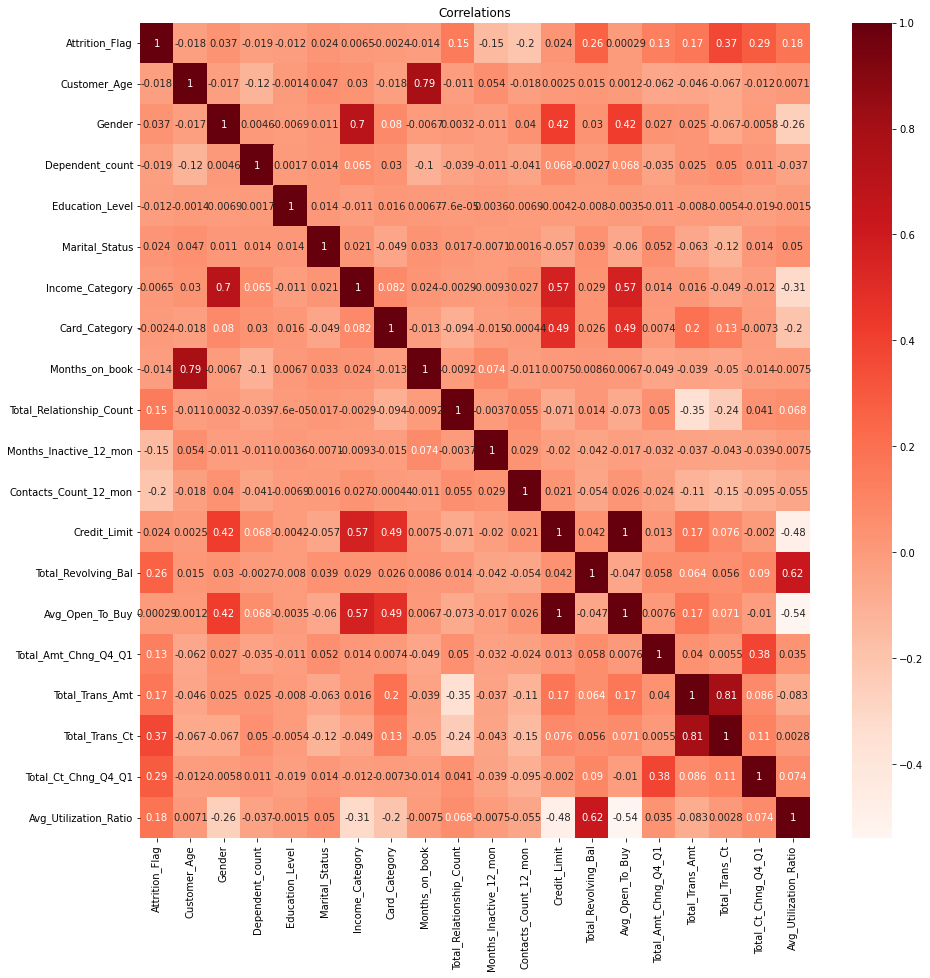

In [ ]:
import seaborn as sns
plt.figure(figsize=(15,15))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.title("Correlations")
plt.show()

In [ ]:
#Remove or engineer high correlation columns with corr>0.8
#Drop: Avg_Open_To_Buy, total trans amount, total trans count
#Aggregate: Avg trans amount=total trans amount/total trans count
data["Avg_Trans_Amt"]= data["Total_Trans_Amt"]/data["Total_Trans_Ct"]
data.drop(["Avg_Open_To_Buy","Total_Trans_Amt", "Total_Trans_Ct"],axis=1,inplace=True)
data.head()

Attrition_Flag  Customer_Age  Gender  Dependent_count  Education_Level  \
0               1            45       1                3                1   
1               1            49       0                5                3   
2               1            51       1                3                3   
3               1            40       0                4                1   
4               1            40       1                3                0   

   Marital_Status  Income_Category  Card_Category  Months_on_book  \
0               1            70000              1              39   
1               0            40000              1              44   
2               1           100000              1              36   
3               0            40000              1              34   
4               1            70000              1              21   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777                 1.335   
1        8256.0                  864                 1.541   
2        3418.0                    0                 2.594   
3        3313.0                 2517                 1.405   
4        4716.0                    0                 2.175   

   Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  Avg_Trans_Amt  
0                1.625                  0.061      27.238095  
1                3.714                  0.105      39.121212  
2                2.333                  0.000      94.350000  
3                2.333                  0.760      58.550000  
4                2.500                  0.000      29.142857

## 3 Data Visualisations
Descriptive analytics

Below we see all measures measures of central tendency and the count for each attribute

In [ ]:
data.describe()

Attrition_Flag  Customer_Age        Gender  Dependent_count  \
count    10127.000000  10127.000000  10127.000000     10127.000000   
mean         0.839340     46.325960      0.470919         2.346203   
std          0.367235      8.016814      0.499178         1.298908   
min          0.000000     26.000000      0.000000         0.000000   
25%          1.000000     41.000000      0.000000         1.000000   
50%          1.000000     46.000000      0.000000         2.000000   
75%          1.000000     52.000000      1.000000         3.000000   
max          1.000000     73.000000      1.000000         5.000000   

       Education_Level  Marital_Status  Income_Category  Card_Category  \
count     10127.000000    10127.000000     10127.000000   10127.000000   
mean          1.751950        0.462822     62954.478128       1.083638   
std           1.496091        0.498641     25777.274988       0.333784   
min           0.000000        0.000000     40000.000000       1.000000   
25%           0.000000        0.000000     40000.000000       1.000000   
50%           2.000000        0.000000     50000.000000       1.000000   
75%           3.000000        1.000000     70000.000000       1.000000   
max           5.000000        1.000000    120000.000000       4.000000   

       Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
count    10127.000000              10127.000000            10127.000000   
mean        35.928409                  3.812580                2.341167   
std          7.986416                  1.554408                1.010622   
min         13.000000                  1.000000                0.000000   
25%         31.000000                  3.000000                2.000000   
50%         36.000000                  4.000000                2.000000   
75%         40.000000                  5.000000                3.000000   
max         56.000000                  6.000000                6.000000   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count           10127.000000  10127.000000         10127.000000   
mean                2.455317   8631.953698          1162.814061   
std                 1.106225   9088.776650           814.987335   
min                 0.000000   1438.300000             0.000000   
25%                 2.000000   2555.000000           359.000000   
50%                 2.000000   4549.000000          1276.000000   
75%                 3.000000  11067.500000          1784.000000   
max                 6.000000  34516.000000          2517.000000   

       Total_Amt_Chng_Q4_Q1  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  \
count          10127.000000         10127.000000           10127.000000   
mean               0.759941             0.712222               0.274894   
std                0.219207             0.238086               0.275691   
min                0.000000             0.000000               0.000000   
25%                0.631000             0.582000               0.023000   
50%                0.736000             0.702000               0.176000   
75%                0.859000             0.818000               0.503000   
max                3.397000             3.714000               0.999000   

       Avg_Trans_Amt  
count   10127.000000  
mean       62.612717  
std        26.404198  
min        19.137931  
25%        47.514573  
50%        55.794872  
75%        65.476673  
max       190.193182

We visualise the dispersion and variability of numerical data below with box plots and count for categorical variables with bar charts below

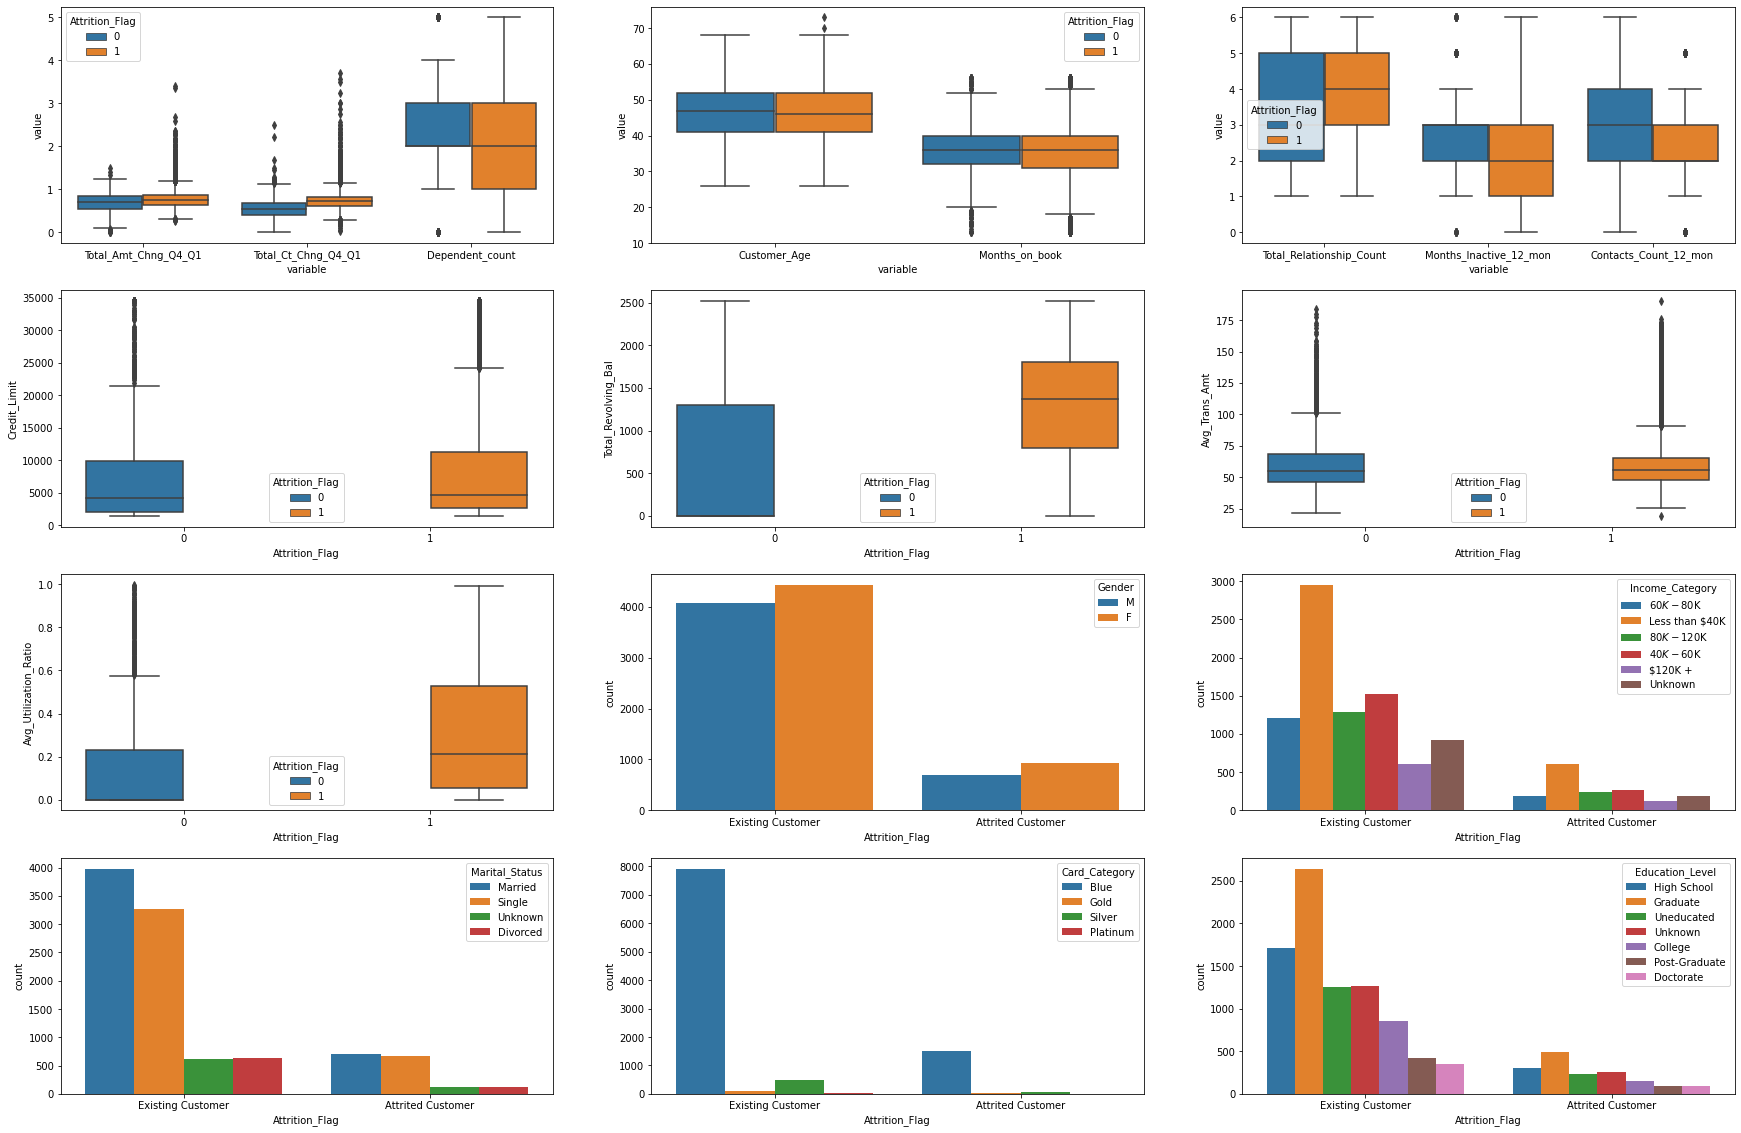

In [ ]:
mini=["Attrition_Flag","Total_Amt_Chng_Q4_Q1","Total_Ct_Chng_Q4_Q1","Dependent_count"]
small=['Attrition_Flag',"Customer_Age","Months_on_book",]
med=['Attrition_Flag',"Total_Relationship_Count","Months_Inactive_12_mon","Contacts_Count_12_mon",]
fig ,ax = plt.subplots(4,3, figsize=[30,20])
#numerical
sns.boxplot(x='variable', y='value', hue="Attrition_Flag", data=pd.melt(data[mini], id_vars='Attrition_Flag'),ax=ax[0][0])
sns.boxplot(x='variable', y='value', hue="Attrition_Flag", data=pd.melt(data[small], id_vars='Attrition_Flag'),ax=ax[0][1])
sns.boxplot(x='variable', y='value', hue="Attrition_Flag", data=pd.melt(data[med], id_vars='Attrition_Flag'),ax=ax[0][2])
sns.boxplot(x='Attrition_Flag', y='Credit_Limit', hue="Attrition_Flag", data=data,ax=ax[1][0])
sns.boxplot(x='Attrition_Flag', y='Total_Revolving_Bal', hue="Attrition_Flag", data=data,ax=ax[1][1])
sns.boxplot(x='Attrition_Flag', y='Avg_Trans_Amt', hue="Attrition_Flag", data=data,ax=ax[1][2])
sns.boxplot(x='Attrition_Flag', y='Avg_Utilization_Ratio', hue="Attrition_Flag", data=data,ax=ax[2][0])
#categorical
sns.countplot(x='Attrition_Flag', hue='Gender', data=data_cat, ax=ax[2][1])
sns.countplot(x='Attrition_Flag', hue='Income_Category', data=data_cat, ax=ax[2][2])
sns.countplot(x='Attrition_Flag', hue='Marital_Status', data=data_cat, ax=ax[3][0])
sns.countplot(x='Attrition_Flag', hue='Card_Category', data=data_cat, ax=ax[3][1])
sns.countplot(x='Attrition_Flag', hue='Education_Level', data=data_cat, ax=ax[3][2])


Visualise the measures of distribution or shape using histogram below

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8124422ed0>,
      dtype=object)

<Figure size 2160x1440 with 0 Axes>

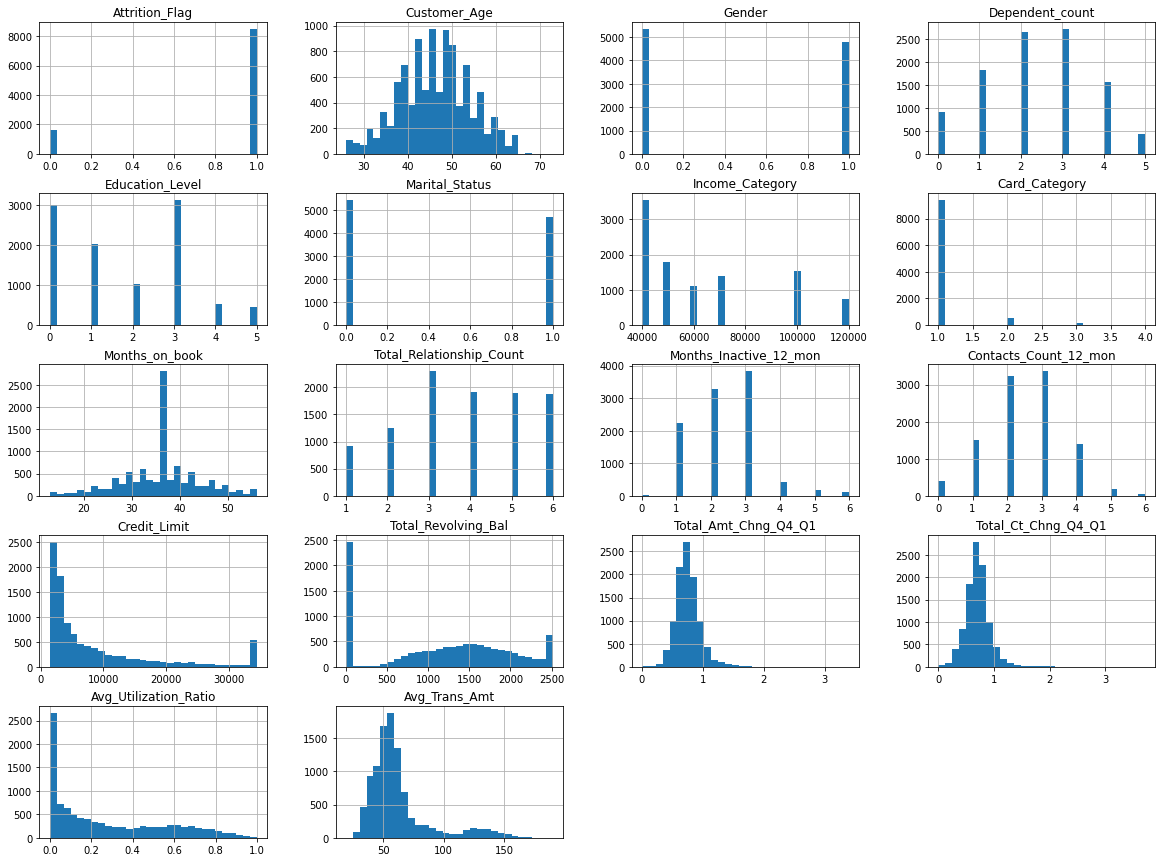

In [ ]:
#histogram for all
plt.figure(figsize=(30,20))
data.hist(bins=30, figsize=(20, 15))

There is a positive skew in credit limit, avg utilization ratio and avg trans amount

there is a positive kurtosis in months on book and a negative kurtosis for total revolving balance


Measure of relationship with scatter plots

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8123a2add0>,
      dtype=object)

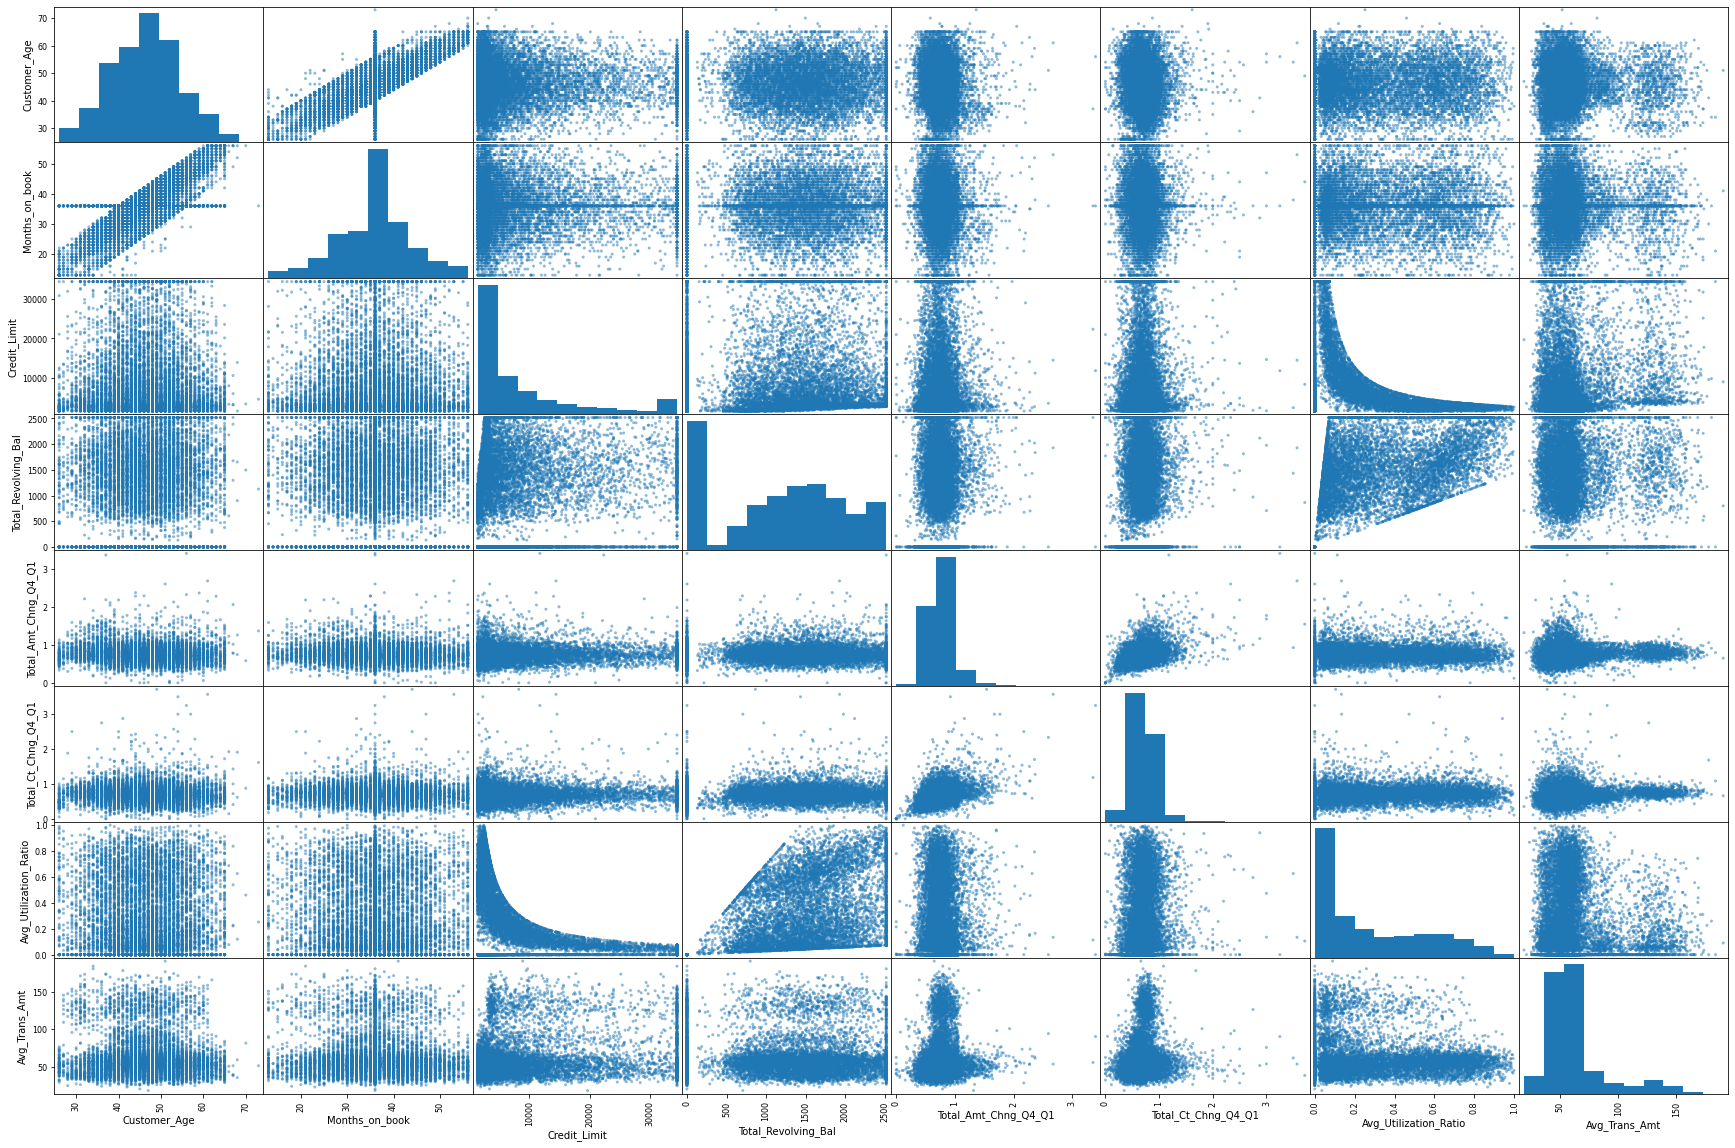

In [ ]:
#scatter for numerical
#similar to correlation those with relationship are credit limit with utilization and months on book and age
numeric= data[['Customer_Age',
       'Months_on_book', 'Credit_Limit', 'Total_Revolving_Bal',
       'Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Avg_Trans_Amt']].copy()
pd.plotting.scatter_matrix(numeric, figsize= (30,20))

Measuring count by pie for categorical

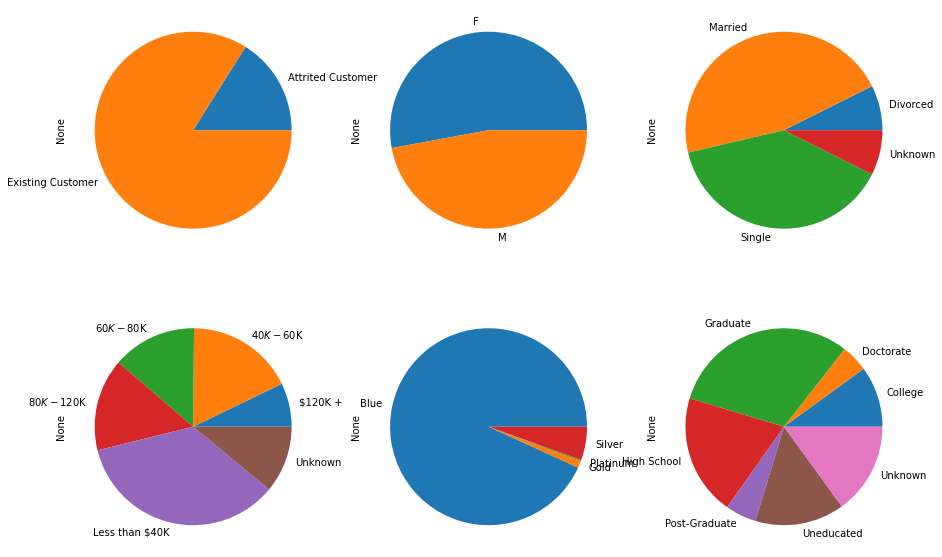

In [ ]:
#pie for categorical
fig, ax = plt.subplots(2,3,figsize=(15, 10))
data_cat.groupby("Attrition_Flag").size().plot.pie(ax=ax[0,0])
data_cat.groupby("Gender").size().plot.pie(ax=ax[0,1])
data_cat.groupby("Marital_Status").size().plot.pie(ax=ax[0,2])
data_cat.groupby("Income_Category").size().plot.pie(ax=ax[1,0])
data_cat.groupby("Card_Category").size().plot.pie(ax=ax[1,1])
data_cat.groupby("Education_Level").size().plot.pie(ax=ax[1,2])

## 4 Model Building
Focus on classification models

In [ ]:
X= data.drop("Attrition_Flag",axis=1)
y= data["Attrition_Flag"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=6400)

In [ ]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(8101, 17) (2026, 17) (8101,) (2026,)


In [ ]:
!pip install scikit-plot
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
import scikitplot as skplt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
def evaluate(model,y_test,y_pred):
  accuracy = accuracy_score(y_test, y_pred)
  precision, recall, fscore, support = precision_recall_fscore_support(y_test,y_pred,average="weighted")
  print('{} \taccuracy = {:.3f}, \tprecision= {:.3f}, \trecall= {:.3f}, \tF-score= {:.3f}'.format(model,accuracy, precision, recall, fscore))
  return [accuracy, precision, recall, fscore]

We use classification models as our target is binary

Decision Tree 	accuracy = 0.884, 	precision= 0.874, 	recall= 0.884, 	F-score= 0.873
Random forest 	accuracy = 0.845, 	precision= 0.863, 	recall= 0.845, 	F-score= 0.785
Bagging 	accuracy = 0.890, 	precision= 0.882, 	recall= 0.890, 	F-score= 0.880
Adaboost 	accuracy = 0.886, 	precision= 0.877, 	recall= 0.886, 	F-score= 0.874
Logistic Regression 	accuracy = 0.834, 	precision= 0.695, 	recall= 0.834, 	F-score= 0.758
KNearestNeighbor 	accuracy = 0.818, 	precision= 0.780, 	recall= 0.818, 	F-score= 0.791


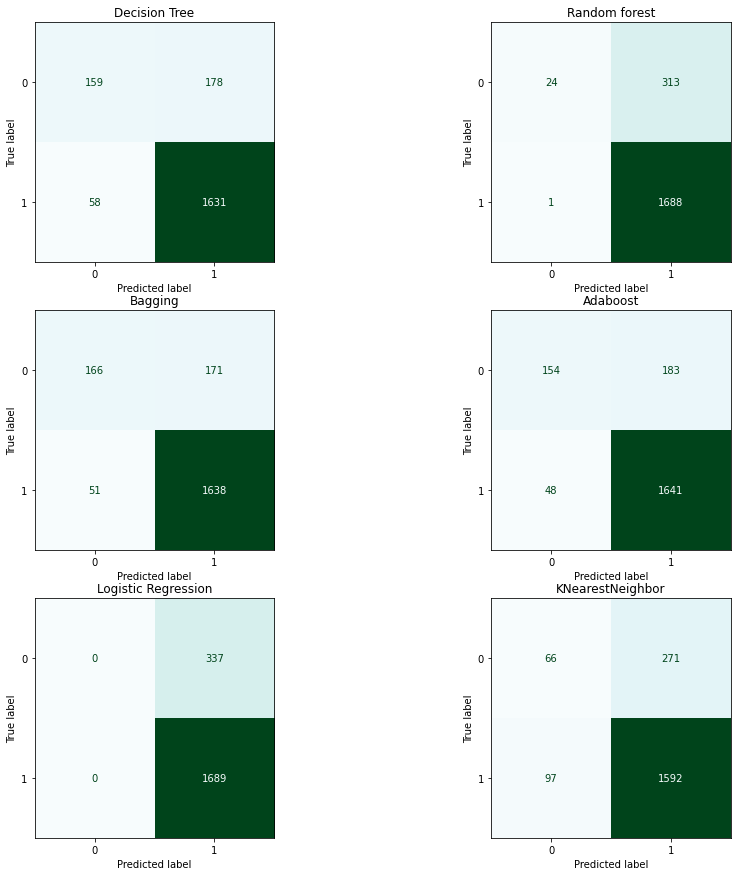

In [ ]:
#Classification models
basicmodels=pd.DataFrame()

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(15,15))
np.random.seed(1)
#decision tree
ax[0][0].title.set_text("Decision Tree")
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=5, criterion='entropy', random_state=0).fit(X_train, y_train)
y_pred = clf.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred,ax=ax[0][0],cmap="BuGn",colorbar=False)
basicmodels["Decision Tree"]= evaluate("Decision Tree",y_test,y_pred)

#Random forest
ax[0][1].title.set_text("Random forest")
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2,n_estimators=500,random_state=0).fit(X_train, y_train)
y_pred = clf.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred,ax=ax[0][1],cmap="BuGn",colorbar=False)
basicmodels["Random forest"]= evaluate("Random forest",y_test,y_pred)

  #Bagging
ax[1][0].title.set_text("Bagging")
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(DecisionTreeClassifier(max_depth=5),n_estimators=50,random_state=0).fit(X_train, y_train)
y_pred = clf.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred,ax=ax[1][0],cmap="BuGn",colorbar=False)
basicmodels["Bagging"]= evaluate("Bagging",y_test,y_pred)

  #Adaboost
ax[1][1].title.set_text("Adaboost")
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2),n_estimators=5,random_state=0).fit(X_train, y_train)
y_pred = clf.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred,ax=ax[1][1],cmap="BuGn",colorbar=False)
basicmodels["Adaboost"]= evaluate("Adaboost",y_test,y_pred)

  # Logistic Regression
ax[2][0].title.set_text("Logistic Regression")
from sklearn.linear_model import LogisticRegression
Lr = LogisticRegression(random_state=0).fit(X_train, y_train)
Lr_pred = Lr.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, Lr_pred,ax=ax[2][0],cmap="BuGn",colorbar=False)
basicmodels["Logistic Regression"]= evaluate("Logistic Regression",y_test,Lr_pred)

  #Knn
ax[2][1].title.set_text("KNearestNeighbor")
from sklearn import neighbors
knn=neighbors.KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_pred=knn.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, knn_pred,ax=ax[2][1],cmap="BuGn",colorbar=False)
basicmodels["KNearestNeighbor"]= evaluate("KNearestNeighbor",y_test,knn_pred)
plt.show()

In [ ]:
print("Modeling Results")
basicmodels["Measure"]=["Accuracy", "Precision", "Recall", "F-score"]
basicmodels.set_index("Measure",inplace=True)
basicmodels

Modeling Results


Decision Tree  Random forest   Bagging  Adaboost  \
Measure                                                       
Accuracy        0.883514       0.845015  0.890424  0.885982   
Precision       0.873511       0.862944  0.882103  0.876834   
Recall          0.883514       0.845015  0.890424  0.885982   
F-score         0.872897       0.784778  0.880437  0.873894   

           Logistic Regression  KNearestNeighbor  
Measure                                           
Accuracy              0.833662          0.818361  
Precision             0.694993          0.779746  
Recall                0.833662          0.818361  
F-score               0.758038          0.791205

## 5 Improvement Testing and evaluation


In [ ]:
# Intro to the improvement steps and research
# ### 5.1 Grid searchCV (KNN, Decision Tree, Bagging, AdaBoost)
# - Improve model accuracy by optimizing each model's parameters using Grid search CV​
# - Grid search CV, uses cross validation to run a model while iterating through lists of parameter values given in a dictionary and returning the parameter values with the highest accuracy scores. We ran grid Search CV for the following model parameters​
# - Finish with BestModels with optimal parameters

# ### 5.2 Feature Selection
# - Feature selection through wrapper model
# - Evaluates the importance of each column attributes when modeling
# - dropping the attributes that are least important in both models
# - Finish with new dataset with best attributes selected

# ### 5.3 Imbalance fix (only on train data)
# - Our data is currently imbalanced at 84%:16%
#   - First under sample to 50% and run above models with new dataset.
#     - Results are worse than before (speculation because of the sample being too small)

#   - Second find best under and over sampling % with the highest accuracy results and rebalance
#     - The results are better but still lower than original. We know its not the sample size, model or data. Speculation of overfitting from Train Test Split.

# ### 5.4 Cross validation and ROC curve:
# - Cross validation
#   - Train test split may be bias causing overfitting, test using 5 fold cross validation. Splits data 5 times into different training and testing sets across the entire data. Removing any bias from a single train test split
# https://towardsdatascience.com/5-reasons-why-you-should-use-cross-validation-in-your-data-science-project-8163311a1e79
# - StratifiedKfold
#     - Because of the unbalanced dataset to avoid getting folds with unbalanced data, we use stratifiedKfold. (splits the folds while keeping the same class distribution in each fold.)
# https://machinelearningmastery.com/cross-validation-for-imbalanced-classification/#:~:text=493%2C%201%3D7-,Fix%20Cross%2DValidation%20for%20Imbalanced%20Classification,class%20distribution%20in%20each%20subset.
#     - benefits:
# https://stats.stackexchange.com/questions/440256/why-does-my-model-consistently-perform-worse-in-cross-validation
# - ROC Curve
#   - Another way of visualising the confusion matrix by focusing on the fpr, tpr. Our goal is to predict the attrition therefore we will focus on the positive predictions.
#   - Goal of ROC is to get as far away from 50% (.5 predicted true correctly .5 predicted false incorrectly) and maximise the area under the curve (AUC)
#   https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc#:~:text=An%20ROC%20curve%20(receiver%20operating,False%20Positive%20Rate

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
#Remember to only use train for optimisation changes
X= data.drop("Attrition_Flag",axis=1)
y= data["Attrition_Flag"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=6400)

### 5.1 Grid Search CV
Optimise each model's parameters

In [ ]:
def plotGrid(parameters, grid, param,model):
  plt.plot(parameters,grid.cv_results_['mean_test_score'])
  plt.legend(loc='best')
  plt.xlabel(param)
  plt.ylabel("Accuracy Score")
  plt.axvline(x=grid.best_params_[param], color='b', ls='--',label='Best Parameter Value')
  plt.legend(loc='best')
  plt.title(model+"'s Grid Search CV results")
  plt.show()

#### KNN model
- n_neighbors= Number of neighbors X used when predicting Y

In [ ]:
knnparameters = {
    'n_neighbors':[5,10,20,30,50,80,100]
}
Grid_KNN = GridSearchCV(neighbors.KNeighborsClassifier(),knnparameters, cv=5)
Grid_KNN.fit(X_train, y_train)
Grid_KNN.best_params_

{'n_neighbors': 80}

In [ ]:
BestKNN = neighbors.KNeighborsClassifier(n_neighbors=Grid_KNN.best_params_["n_neighbors"])

Example of how grid search cv works, more graphs below

No handles with labels found to put in legend.


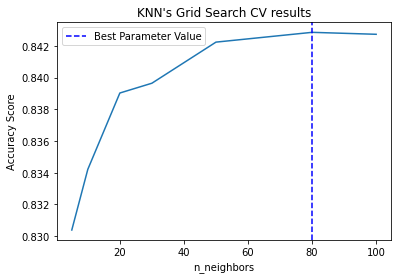

In [ ]:
plotGrid(knnparameters["n_neighbors"], Grid_KNN, "n_neighbors","KNN")

#### Logistic Regression
- max_iter= Maximum number of iterations taken for the solvers to converge

In [ ]:
LRiter= [10,50,100,150,200]
LRparameters = {
    'max_iter':LRiter
}
Grid_LR = GridSearchCV(LogisticRegression(),LRparameters, cv=5)
Grid_LR.fit(X_train, y_train)
Grid_LR.best_params_

{'max_iter': 200}

In [ ]:
BestLR= LogisticRegression(max_iter= Grid_LR.best_params_["max_iter"],random_state=0)

No handles with labels found to put in legend.


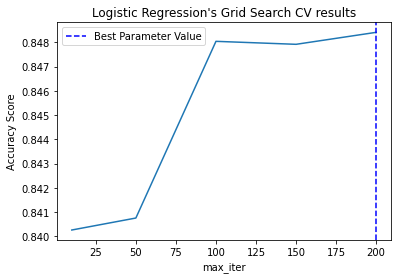

In [ ]:
plotGrid(LRiter, Grid_LR, "max_iter","Logistic Regression")

#### Random Forest Classifier
- max_depth = The maximum depth of the tree for the nodes to continue expanding
- n_estimators= The number of trees in the forest
- min_samples_split= The minimum number of samples required to split an internal node:

In [ ]:
Rfn_estimators= [5, 10, 20, 50,100]
Rfdepths = np.arange(1, 10, 2)
Rfparameters = {
    'max_depth':Rfdepths,
    'n_estimators':Rfn_estimators,
}

Grid_RF = GridSearchCV(RandomForestClassifier(),Rfparameters, cv=5)
Grid_RF.fit(X_train, y_train)
Grid_RF.best_params_

{'max_depth': 9, 'n_estimators': 100}

In [ ]:
BestRF = RandomForestClassifier(max_depth=Grid_RF.best_params_["max_depth"],n_estimators=Grid_RF.best_params_["n_estimators"],random_state=0)

Text(0.5, 1.0, 'Random Forest Grid Search CV results')

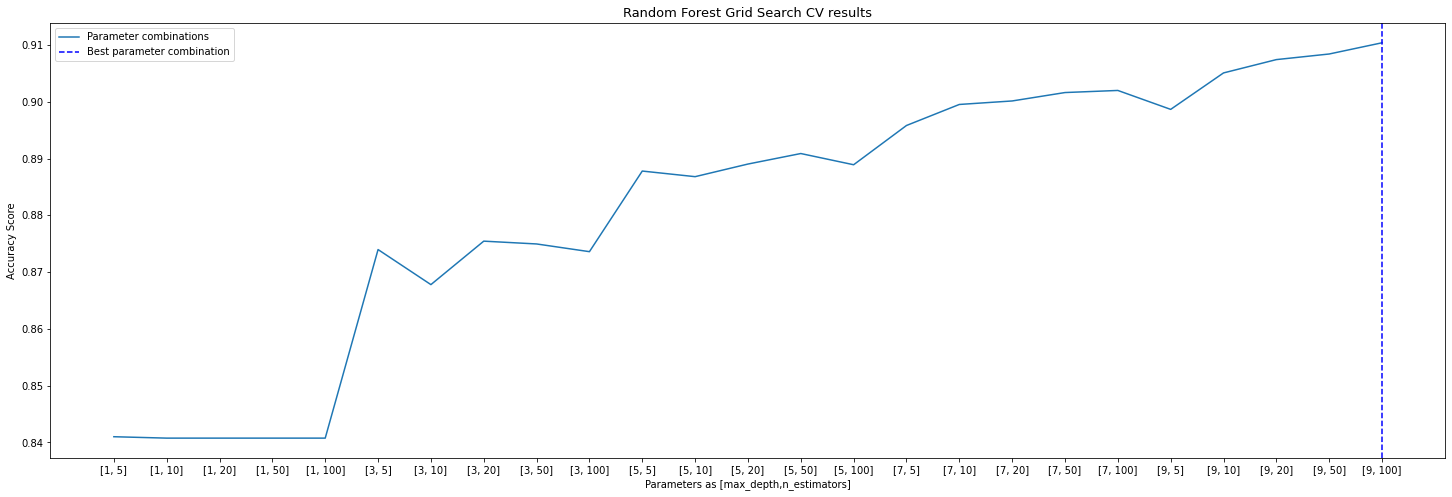

In [ ]:
plt.figure(figsize=(25,8))
RFresultparams=[]
for i in Grid_RF.cv_results_['params']:
  RFresultparams.append(str(list(i.values())))
RFresultparams
plt.plot(RFresultparams,Grid_RF.cv_results_['mean_test_score'],label="Parameter combinations")
plt.xlabel("Parameters as [max_depth,n_estimators]")
plt.ylabel("Accuracy Score")
plt.axvline(x=str(list(Grid_RF.best_params_.values())), color='b', ls='--',label="Best parameter combination")
plt.legend(loc='best')
plt.title("Random Forest Grid Search CV results",fontsize=13)

#### Decision tree
- max_depth = The maximum depth of the tree for the nodes to continue expanding
- max_leaf_nodes= maximum leaf nodes in the tree before stopping.

Nodes are defined as relative reduction in impurity

In [ ]:
DTdepths = np.arange(1, 10)
DTnum_leafs = [5, 10, 20, 50]
try_grid = [{'max_depth':DTdepths,
              'max_leaf_nodes':DTnum_leafs}]
DTM = GridSearchCV(DecisionTreeClassifier(), param_grid=try_grid, cv=5)
DTM.fit(X_train,y_train)
#find the best parameters
DTM.best_params_

{'max_depth': 7, 'max_leaf_nodes': 50}

In [ ]:
BestDT = DecisionTreeClassifier(max_depth= DTM.best_params_["max_depth"], max_leaf_nodes= DTM.best_params_["max_leaf_nodes"], random_state=10)

Text(0.5, 1.0, 'Decision Tree Grid Search CV results')

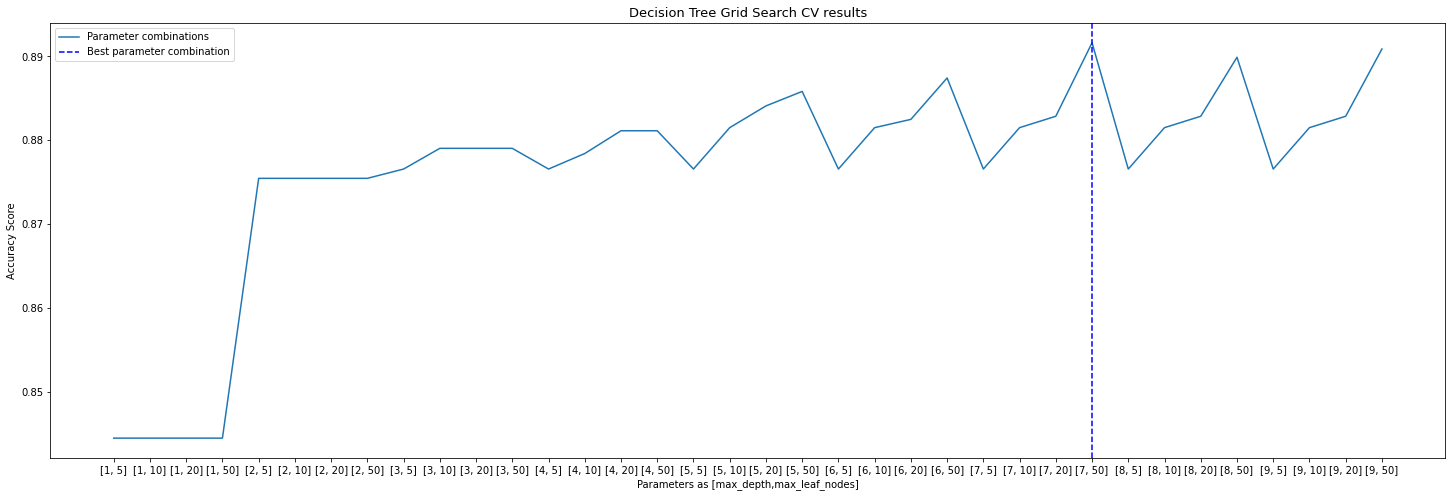

In [ ]:
plt.figure(figsize=(25,8))
DTresultparams=[]
for i in DTM.cv_results_['params']:
  DTresultparams.append(str(list(i.values())))
DTresultparams
plt.plot(DTresultparams,DTM.cv_results_['mean_test_score'],label="Parameter combinations")
plt.xlabel("Parameters as [max_depth,max_leaf_nodes]")
plt.ylabel("Accuracy Score")
plt.axvline(x=str(list(DTM.best_params_.values())), color='b', ls='--',label="Best parameter combination")
plt.legend(loc='best')
plt.title("Decision Tree Grid Search CV results",fontsize=13)

#### BaggingClassifier
n_estimators= The number of base estimators in each ensemble


In [ ]:
bn_estimators= [5, 10, 20, 50,100,200]
bnparameters = {'n_estimators':bn_estimators}
Grix_b = GridSearchCV(BaggingClassifier(DecisionTreeClassifier(max_depth= 4, max_leaf_nodes= 20)), bnparameters, cv=5)
Grix_b.fit(X_train,y_train)
#find the best parameters
Grix_b.best_params_

{'n_estimators': 20}

In [ ]:
BestBagging = BaggingClassifier(DecisionTreeClassifier(max_depth= DTM.best_params_["max_depth"], max_leaf_nodes= DTM.best_params_["max_leaf_nodes"]),n_estimators=Grix_b.best_params_["n_estimators"],random_state=0)

No handles with labels found to put in legend.


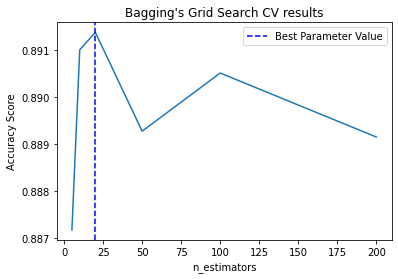

In [ ]:
plotGrid(bn_estimators, Grix_b, "n_estimators","Bagging")

#### Adaboost
n_estimators= The maximum number of estimators at which boosting is terminated. In case of perfect fit, the learning procedure is stopped early


In [ ]:
an_estimators= [5, 10, 20, 50,100,200]
anparameters = {'n_estimators':bn_estimators}
Grid_a = GridSearchCV(AdaBoostClassifier(DecisionTreeClassifier(max_depth= 4, max_leaf_nodes= 20)),anparameters, cv=5)
Grid_a.fit(X_train,y_train)
#find the best parameters
Grid_a.best_params_

{'n_estimators': 200}

In [ ]:
BestAda = AdaBoostClassifier(DecisionTreeClassifier(max_depth= DTM.best_params_["max_depth"], max_leaf_nodes= DTM.best_params_["max_leaf_nodes"]),n_estimators=Grid_a.best_params_["n_estimators"],random_state=0)

No handles with labels found to put in legend.


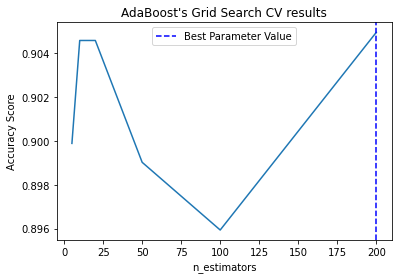

In [ ]:
plotGrid(an_estimators, Grid_a, "n_estimators","AdaBoost")

#### Plotting all Grid Search Cv results
- Note best parameter chosen is not always the highest graphed here because models with multiple parameters have results chosen by best combination of all parameters rather than individually as graphed here

In [ ]:
def GridCV(model,axs,GridCVResults):
  grid= GridCVResults[0]
  param=GridCVResults[1]
  parameters=GridCVResults[2]

  axs.plot(parameters,grid.cv_results_["mean_test_score"],label=param)

  axs.set_xlabel(param)
  axs.set_ylabel("Accuracy Score")
  axs.axvline(x=grid.best_params_[param], color='b', ls='--',label="Best "+param+" ="+str(grid.best_params_[param]))
  axs.legend(loc='best')
  axs.set_title(model+" Grid Search CV results",fontsize=13)

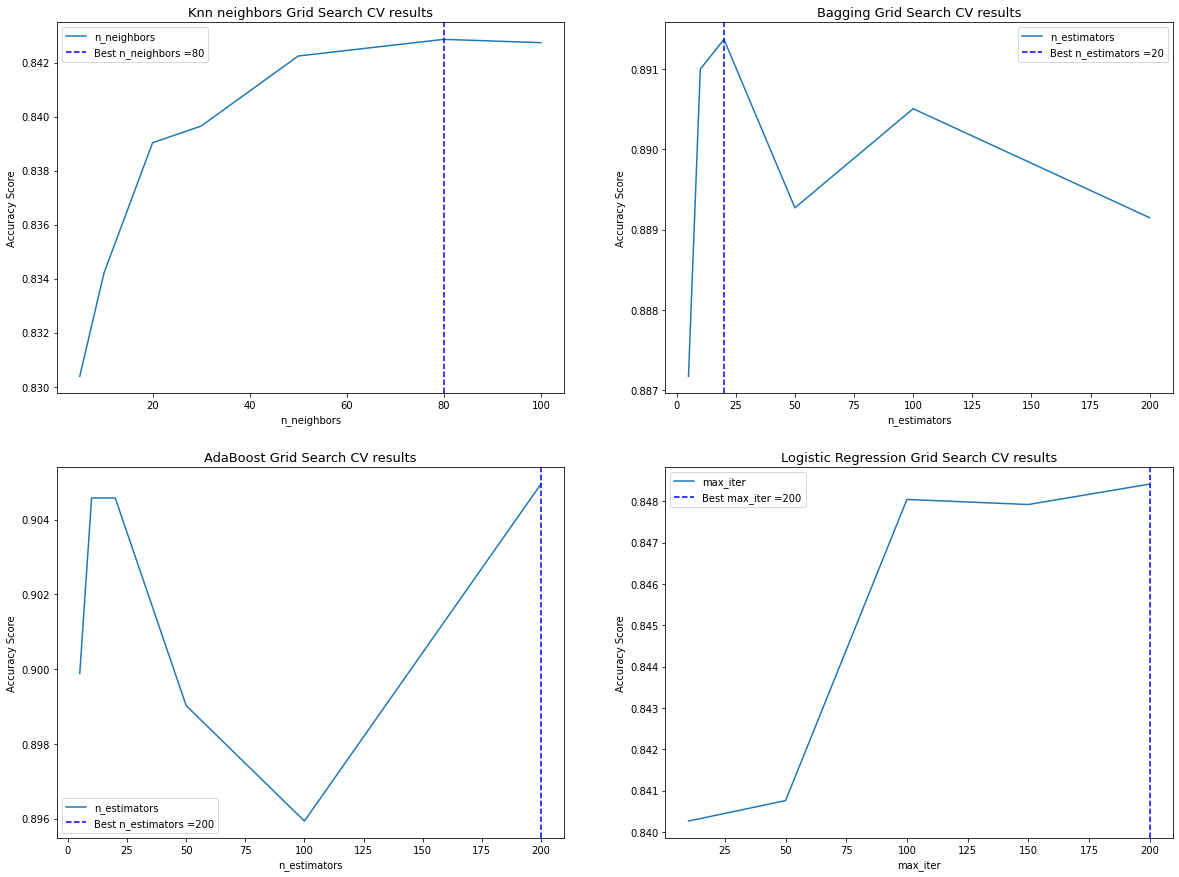

In [ ]:
GridCVResults= {"Knn neighbors":[Grid_KNN,'n_neighbors',knnparameters["n_neighbors"]],
         "Bagging":[Grix_b,'n_estimators',bn_estimators],
         "AdaBoost":[Grid_a,'n_estimators',an_estimators],
         "Logistic Regression":[Grid_LR,'max_iter',LRiter]}

fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))

for key,axs in zip(GridCVResults.keys(),axis.ravel()):
  GridCV(key,axs,GridCVResults[key])

Random forest and Decision tree results together

Text(0.5, 1.0, 'Decision Tree Grid Search CV results')

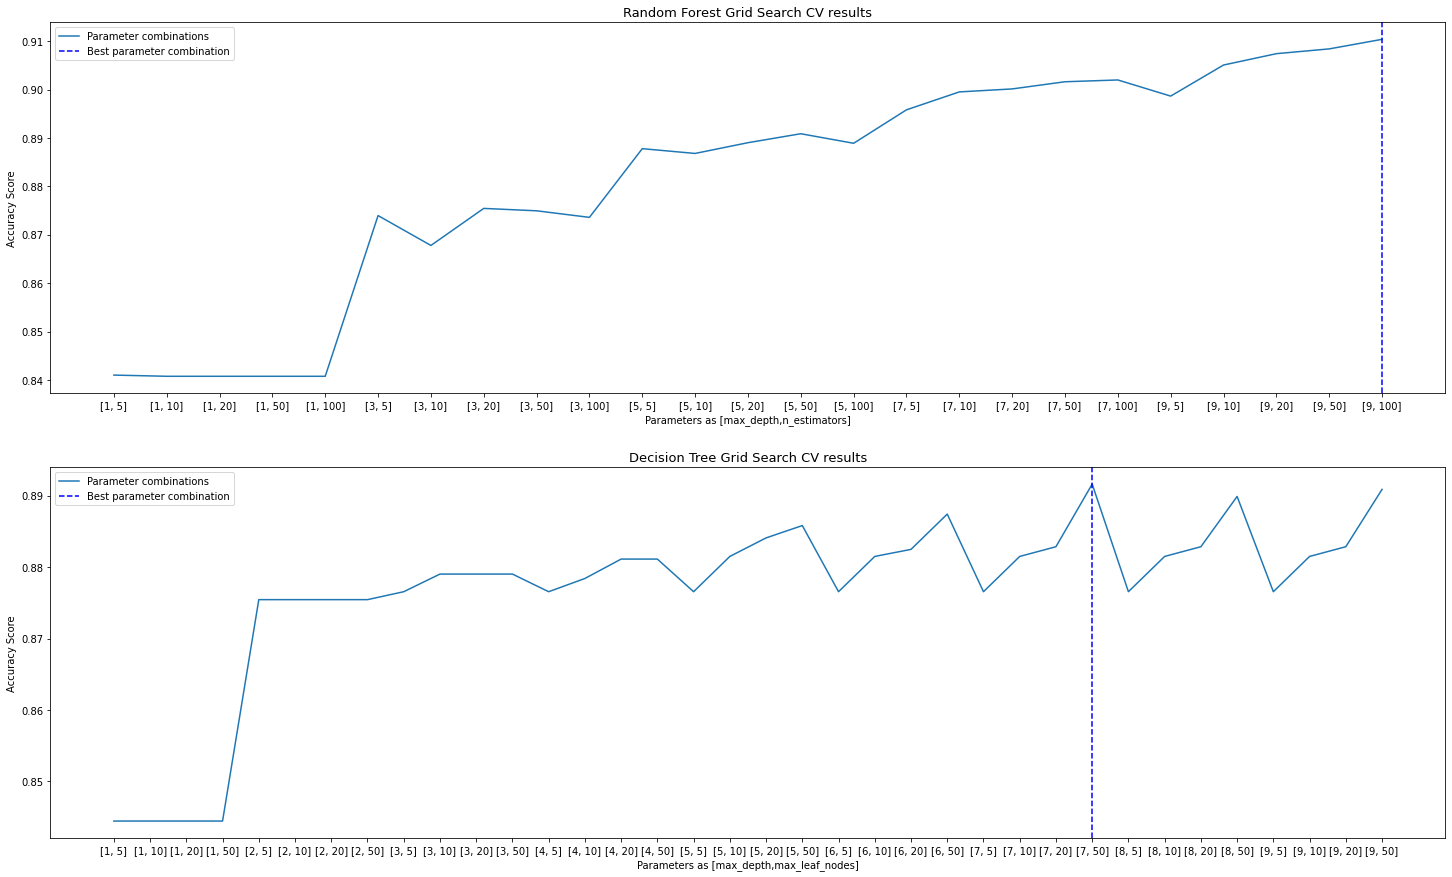

In [ ]:
fig, (ax1,ax2) = plt.subplots(nrows=2, ncols=1, figsize=(25, 15))
RFresultparams=[]
for i in Grid_RF.cv_results_['params']:
  RFresultparams.append(str(list(i.values())))
RFresultparams
ax1.plot(RFresultparams,Grid_RF.cv_results_['mean_test_score'],label="Parameter combinations")
ax1.set_xlabel("Parameters as [max_depth,n_estimators]")
ax1.set_ylabel("Accuracy Score")
ax1.axvline(x=str(list(Grid_RF.best_params_.values())), color='b', ls='--',label="Best parameter combination")
ax1.legend(loc='best')
ax1.set_title("Random Forest Grid Search CV results",fontsize=13)

DTresultparams=[]
for i in DTM.cv_results_['params']:
  DTresultparams.append(str(list(i.values())))
DTresultparams
ax2.plot(DTresultparams,DTM.cv_results_['mean_test_score'],label="Parameter combinations")
ax2.set_xlabel("Parameters as [max_depth,max_leaf_nodes]")
ax2.set_ylabel("Accuracy Score")
ax2.axvline(x=str(list(DTM.best_params_.values())), color='b', ls='--',label="Best parameter combination")
ax2.legend(loc='best')
ax2.set_title("Decision Tree Grid Search CV results",fontsize=13)

### 5.2 Feature Selection
Optimise the attributes in the dataset

In [ ]:
data.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Avg_Trans_Amt'],
      dtype='object')

#### Feature importance by Models

In [ ]:
def FeatureSelection(model,name,axs):
  model.fit(X_train,y_train)
  importance = pd.DataFrame()
  i = 0
  for col in X.columns:
      importance[col] = [model.feature_importances_[i]]
      i += 1
  importance = importance.transpose()
  importance.columns= [name]
  global Features
  Features=pd.concat([Features, importance], axis=1)

  axs.barh(importance[name].sort_values(ascending=True).index, importance[name].sort_values(ascending=True))
  axs.set_title(name+" Feature Importance",fontsize=25)

Decision Tree, Random Forest, AdaBoost
- uses model's feature importance

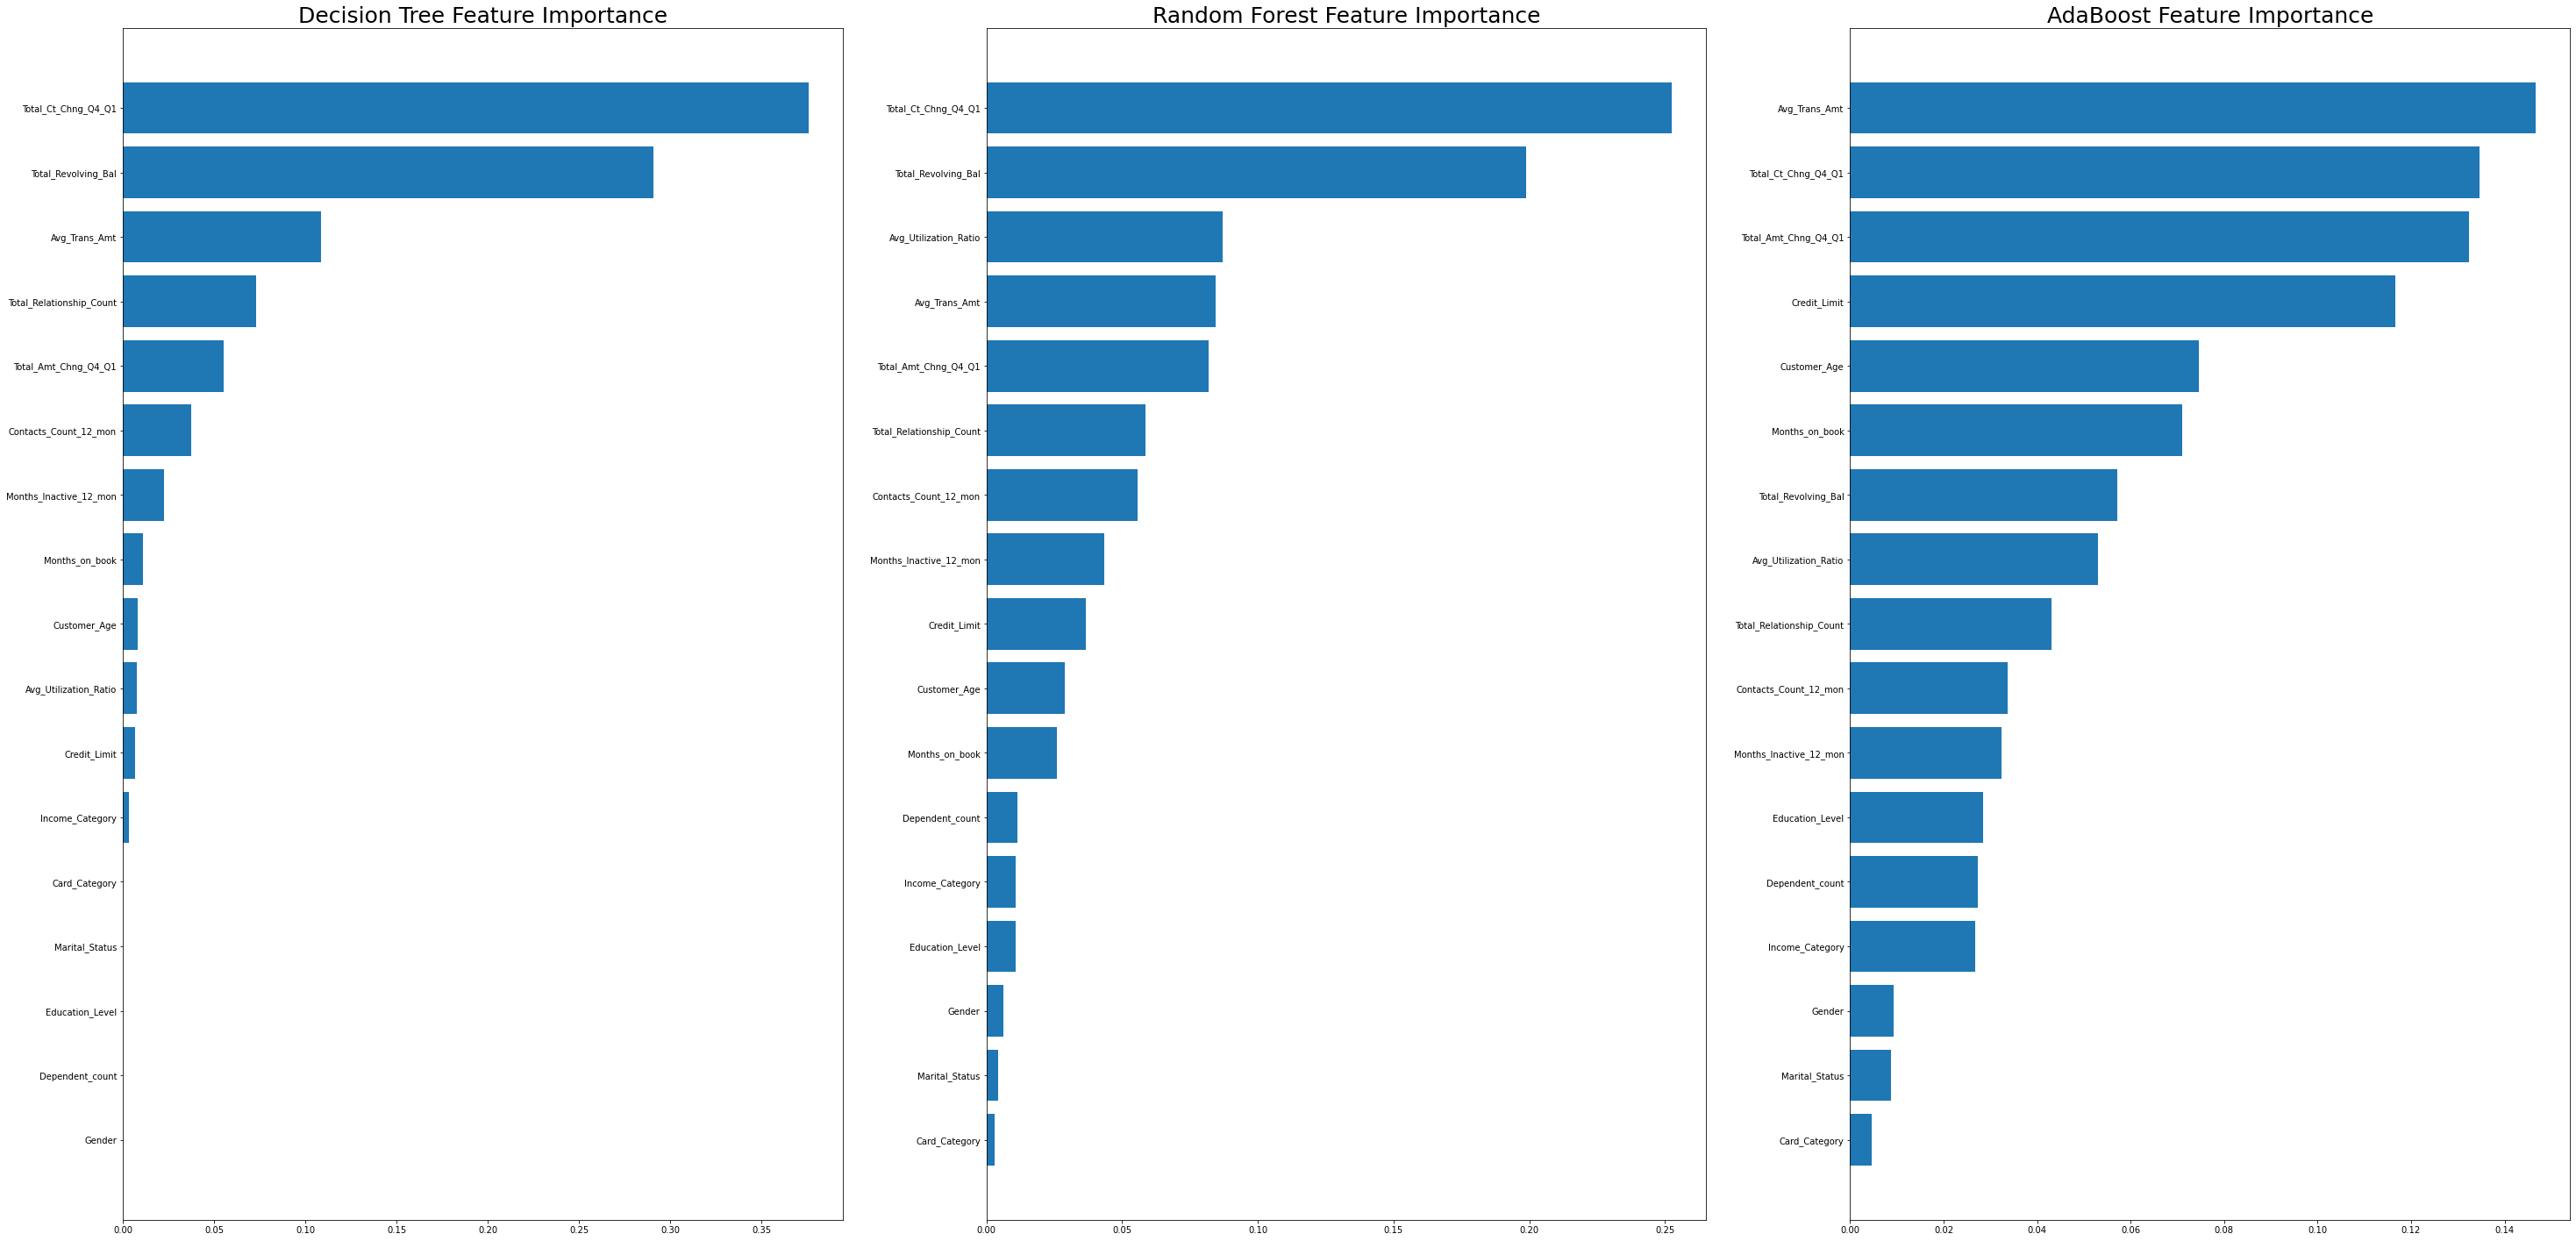

In [ ]:
Features = pd.DataFrame()
fig,axes= plt.subplots(1,3,figsize=(50,25))

for model,name,axs in zip([BestDT,BestRF,BestAda],["Decision Tree","Random Forest","AdaBoost"],axes.ravel()):
  FeatureSelection(model,name,axs)

Text(0.5, 1.0, 'AdaBoost Feature Importance')

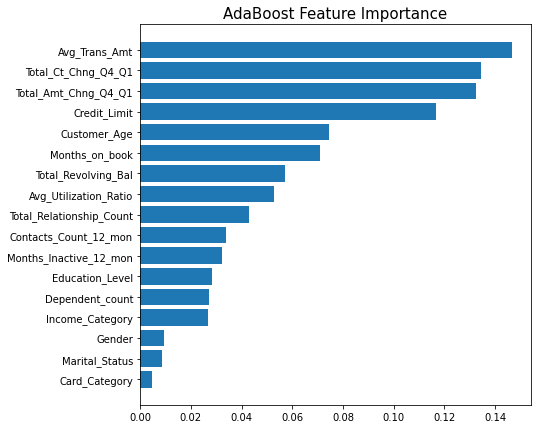

In [ ]:
##Adaboost alone used later
BestAda.fit(X_train,y_train)
importance = pd.DataFrame()
i = 0
for col in X.columns:
    importance[col] = [BestAda.feature_importances_[i]]
    i += 1
importance = importance.transpose()
importance.columns= ["AdaBoost"]

plt.figure(figsize=(7,7))
plt.barh(importance["AdaBoost"].sort_values(ascending=True).index, importance["AdaBoost"].sort_values(ascending=True))
plt.title("AdaBoost"+" Feature Importance",fontsize=15)

Bagging and Logistic regression model
- Bagging uses decision tree inside to get importance
- Logistic regression uses coefficient

Text(0.5, 1.0, 'Logistic Regression Feature Selection')

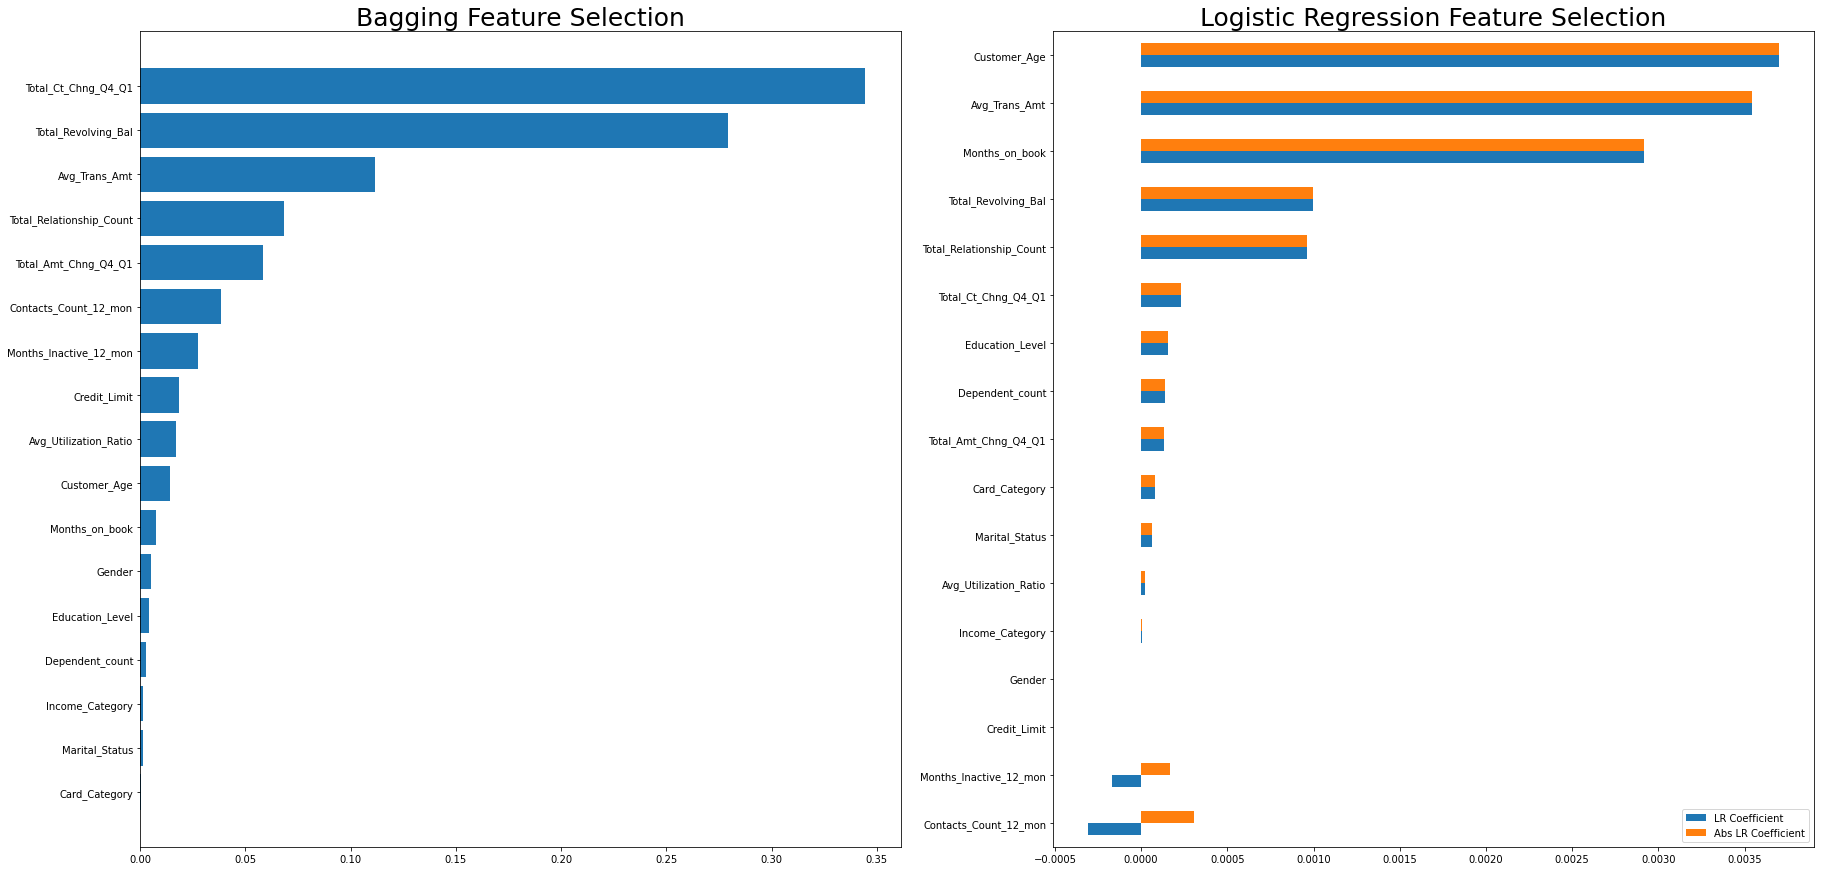

In [ ]:
fig , (ax1,ax2) = plt.subplots(1,2,figsize=(30,15))

#Bagging
BestBagging.fit(X_train,y_train)
importance = pd.DataFrame()
feature_importances = np.mean([tree.feature_importances_ for tree in BestBagging.estimators_], axis=0)
i = 0
for col in X_train.columns:
    importance[col] = [feature_importances[i]]
    i += 1
importance = importance.transpose()
importance.columns= ['Bagging']
Features=pd.concat([Features, importance], axis=1)

ax1.barh(importance['Bagging'].sort_values(ascending=True).index, importance['Bagging'].sort_values(ascending=True))
ax1.set_title("Bagging Feature Selection",fontsize=25)

#Logistic regression
yact = y_train.values.ravel()
proba_y = cross_val_predict(BestLR, X_train, yact, cv=5, method='predict_proba')
BestLR.fit(X_train, yact)
BestLR.intercept_
coeff_df = pd.DataFrame(BestLR.coef_.flatten(), X_train.columns, columns=['LR Coefficient'])
coeff_df["Abs LR Coefficient"]=abs(coeff_df["LR Coefficient"])
Features=pd.concat([Features, coeff_df.drop("LR Coefficient",axis=1)], axis=1)

coeff_df.sort_values(by=["LR Coefficient"],ascending=True).plot(kind="barh",ax=ax2)
ax2.set_title("Logistic Regression Feature Selection",fontsize=25)


In [ ]:
coeff_df.sort_values(by=["Abs LR Coefficient"],ascending=False)

LR Coefficient  Abs LR Coefficient
Customer_Age                    0.003702            0.003702
Avg_Trans_Amt                   0.003544            0.003544
Months_on_book                  0.002915            0.002915
Total_Revolving_Bal             0.000999            0.000999
Total_Relationship_Count        0.000959            0.000959
Contacts_Count_12_mon          -0.000309            0.000309
Total_Ct_Chng_Q4_Q1             0.000230            0.000230
Months_Inactive_12_mon         -0.000168            0.000168
Education_Level                 0.000156            0.000156
Dependent_count                 0.000136            0.000136
Total_Amt_Chng_Q4_Q1            0.000132            0.000132
Card_Category                   0.000082            0.000082
Marital_Status                  0.000066            0.000066
Avg_Utilization_Ratio           0.000021            0.000021
Income_Category                 0.000003            0.000003
Gender                          0.000001            0.000001
Credit_Limit                    0.000001            0.000001

#### Overall Feature importance conclusions

In [ ]:
Features.fillna(0,inplace=True)
Features["Rank score"]=0
Features["Total Importance"]=0
for i in Features.columns[:-2]:
  Features["Total Importance"]= Features["Total Importance"]+Features[i]
  Features["Rank score"]=Features["Rank score"]+Features[i].rank(method='dense',ascending=False)#ranks each column then adds it to score

In [ ]:
Features.sort_values(by=["Total Importance"],ascending=True)#Lower Rank score the better
#prints Features by least importance

Decision Tree  Random Forest  AdaBoost   Bagging  \
Card_Category                  0.000000       0.002823  0.004522  0.000233   
Marital_Status                 0.000000       0.004250  0.008783  0.001239   
Gender                         0.000000       0.006164  0.009358  0.005318   
Dependent_count                0.000000       0.011524  0.027254  0.002691   
Income_Category                0.003106       0.010808  0.026668  0.001456   
Education_Level                0.000000       0.010585  0.028412  0.004222   
Months_on_book                 0.011108       0.025822  0.071042  0.007603   
Months_Inactive_12_mon         0.022593       0.043302  0.032293  0.027542   
Customer_Age                   0.008164       0.028973  0.074622  0.014090   
Avg_Utilization_Ratio          0.007431       0.086973  0.052944  0.016854   
Contacts_Count_12_mon          0.037592       0.055761  0.033707  0.038647   
Credit_Limit                   0.006736       0.036517  0.116691  0.018274   
Total_Relationship_Count       0.073002       0.058654  0.043089  0.068343   
Total_Amt_Chng_Q4_Q1           0.055352       0.081944  0.132298  0.058393   
Avg_Trans_Amt                  0.108447       0.084356  0.146650  0.111612   
Total_Revolving_Bal            0.290861       0.198930  0.057102  0.279249   
Total_Ct_Chng_Q4_Q1            0.375608       0.252615  0.134565  0.344233   

                          Abs LR Coefficient  Rank score  Total Importance  
Card_Category                       0.000082        76.0          0.007660  
Marital_Status                      0.000066        74.0          0.014338  
Gender                              0.000001        71.0          0.020842  
Dependent_count                     0.000136        62.0          0.041605  
Income_Category                     0.000003        69.0          0.042041  
Education_Level                     0.000156        61.0          0.043374  
Months_on_book                      0.002915        39.0          0.118491  
Months_Inactive_12_mon              0.000168        41.0          0.125898  
Customer_Age                        0.003702        35.0          0.129553  
Avg_Utilization_Ratio               0.000021        44.0          0.164223  
Contacts_Count_12_mon               0.000309        35.0          0.166017  
Credit_Limit                        0.000001        49.0          0.178218  
Total_Relationship_Count            0.000959        28.0          0.244047  
Total_Amt_Chng_Q4_Q1                0.000132        29.0          0.328119  
Avg_Trans_Amt                       0.003544        13.0          0.454609  
Total_Revolving_Bal                 0.000999        17.0          0.827140  
Total_Ct_Chng_Q4_Q1                 0.000230        12.0          1.107251

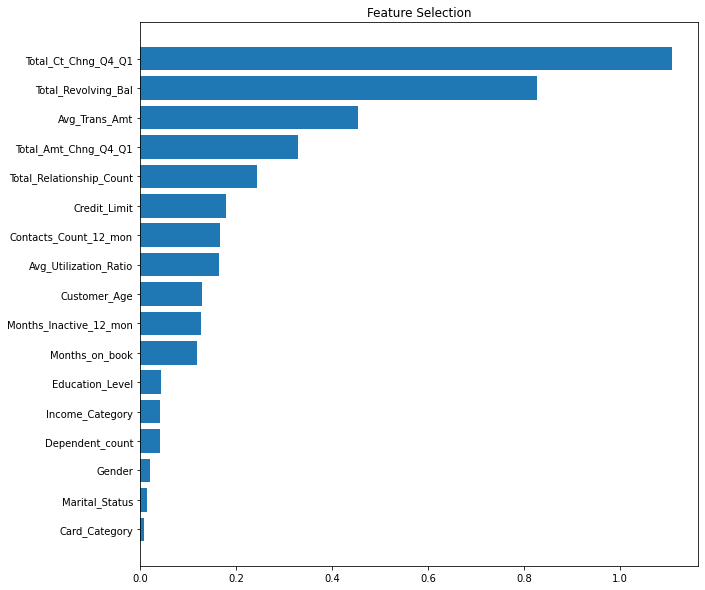

In [ ]:
plt.figure(figsize=(10, 10))
plt.barh(Features['Total Importance'].sort_values(ascending=True).index, Features['Total Importance'].sort_values(ascending=True))
plt.title("Feature Selection")
plt.show()

Drop least important features

In [ ]:
Features.nsmallest(3, 'Total Importance')

Decision Tree  Random Forest  AdaBoost   Bagging  \
Card_Category             0.0       0.002823  0.004522  0.000233   
Marital_Status            0.0       0.004250  0.008783  0.001239   
Gender                    0.0       0.006164  0.009358  0.005318   

                Abs LR Coefficient  Rank score  Total Importance  
Card_Category             0.000082        76.0          0.007660  
Marital_Status            0.000066        74.0          0.014338  
Gender                    0.000001        71.0          0.020842

In [ ]:
NewData= data.drop(Features.nsmallest(3, 'Total Importance').index.tolist(),axis=1)
X= NewData.drop("Attrition_Flag",axis=1)
y= NewData["Attrition_Flag"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6400)

### 5.3 Rebalance Dataset

#### Under Sampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
sampling_strategy = 0.8
rus = RandomUnderSampler(sampling_strategy=sampling_strategy)
X_train_res, y_train_res = rus.fit_resample(X_train, y_train)

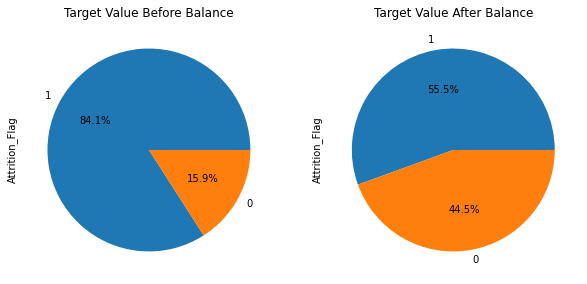

In [ ]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,10))
y_train.value_counts().plot(kind="pie",title="Target Value Before Balance",autopct='%1.1f%%',ax=ax1)
y_train_res.value_counts().plot(kind="pie",title="Target Value After Balance",autopct='%1.1f%%',ax=ax2)

In [ ]:
def modeling(results,model,modelname,X_train, X_test, y_train, y_test):
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  results[modelname]=evaluate(modelname,y_test,y_pred)

In [ ]:
undersamplemodels=pd.DataFrame()

models=[BestDT,BestRF,BestBagging,BestAda,BestLR,BestKNN]
modelnames=["Decision Tree","Random forest","Bagging","Adaboost","Logistic Regression","KNearestNeighbor"]
for model, name in zip(models,modelnames):
  modeling(undersamplemodels,model,name,X_train_res, X_test, y_train_res, y_test)

Decision Tree 	accuracy = 0.826, 	precision= 0.868, 	recall= 0.826, 	F-score= 0.840
Random forest 	accuracy = 0.870, 	precision= 0.894, 	recall= 0.870, 	F-score= 0.878
Bagging 	accuracy = 0.865, 	precision= 0.892, 	recall= 0.865, 	F-score= 0.874
Adaboost 	accuracy = 0.867, 	precision= 0.893, 	recall= 0.867, 	F-score= 0.875
Logistic Regression 	accuracy = 0.769, 	precision= 0.820, 	recall= 0.769, 	F-score= 0.788
KNearestNeighbor 	accuracy = 0.756, 	precision= 0.782, 	recall= 0.756, 	F-score= 0.767


In [ ]:
print("Undersampling Model Results")
undersamplemodels["Measure"]=["Accuracy", "Precision", "Recall", "F-score"]
undersamplemodels.set_index("Measure",inplace=True)
undersamplemodels

Undersampling Model Results


Decision Tree  Random forest   Bagging  Adaboost  \
Measure                                                       
Accuracy        0.826259       0.870188  0.865252  0.866732   
Precision       0.868409       0.893803  0.891978  0.893087   
Recall          0.826259       0.870188  0.865252  0.866732   
F-score         0.839985       0.877943  0.873879  0.875219   

           Logistic Regression  KNearestNeighbor  
Measure                                           
Accuracy              0.768509          0.755676  
Precision             0.820282          0.782345  
Recall                0.768509          0.755676  
F-score               0.787520          0.767434

In [ ]:
# Results are lower than before? Due to small sample size?
print("Total size= ",y_train.shape,"After undersampling",y_train_res.shape)

Total size=  (8101,) After undersampling (2902,)


#### Under and Oversampling

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from numpy import mean
over_values = [0.3,0.4,0.5]
under_values = [0.7,0.6,0.5]
for o in over_values:
  for u in under_values:
    pipeline = Pipeline(steps=[('over', SMOTE(sampling_strategy=o)), ('under', RandomUnderSampler(sampling_strategy=u))])
    X_train_res, y_train_res = pipeline.fit_resample(X_train, y_train)
    clf = BaggingClassifier(DecisionTreeClassifier(max_depth=5),n_estimators=50,random_state=0).fit(X_train_res, y_train_res)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print('oversampling=%.1f, undersampling=%.1f , Accuracy: %.5f' % (o, u, accuracy))

oversampling=0.3, undersampling=0.7 , Accuracy: 0.87710
oversampling=0.3, undersampling=0.6 , Accuracy: 0.88351
oversampling=0.3, undersampling=0.5 , Accuracy: 0.89141
oversampling=0.4, undersampling=0.7 , Accuracy: 0.88055
oversampling=0.4, undersampling=0.6 , Accuracy: 0.87562
oversampling=0.4, undersampling=0.5 , Accuracy: 0.88401
oversampling=0.5, undersampling=0.7 , Accuracy: 0.87512
oversampling=0.5, undersampling=0.6 , Accuracy: 0.88105
oversampling=0.5, undersampling=0.5 , Accuracy: 0.88401


In [ ]:
#oversampling=0.3, undersampling=0.5 , Accuracy: 0.88768 is the highest
pipeline = Pipeline(steps=[('over', SMOTE(sampling_strategy=0.3)), ('under', RandomUnderSampler(sampling_strategy=0.5))])
X_train_res, y_train_res = pipeline.fit_resample(X_train, y_train)

Total size=  (8101,) After undersampling (6129,)


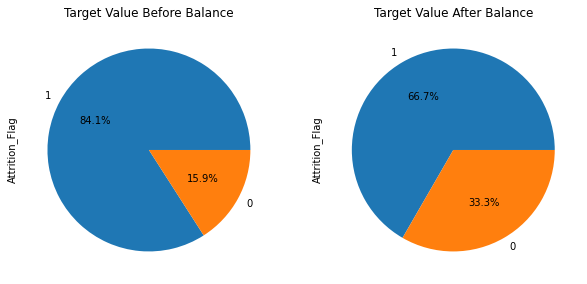

In [ ]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,10))
y_train.value_counts().plot(kind="pie",title="Target Value Before Balance",autopct='%1.1f%%',ax=ax1)
y_train_res.value_counts().plot(kind="pie",title="Target Value After Balance",autopct='%1.1f%%',ax=ax2)
print("Total size= ",y_train.shape,"After undersampling",y_train_res.shape)

In [ ]:
BalancedResults= pd.DataFrame()
models=[BestDT,BestRF,BestBagging,BestAda,BestLR,BestKNN]
modelnames=["Decision Tree","Random forest","Bagging","Adaboost","Logistic Regression","KNearestNeighbor"]
for model, name in zip(models,modelnames):
  modeling(BalancedResults,model,name,X_train_res, X_test, y_train_res, y_test)

Decision Tree 	accuracy = 0.865, 	precision= 0.882, 	recall= 0.865, 	F-score= 0.871
Random forest 	accuracy = 0.903, 	precision= 0.901, 	recall= 0.903, 	F-score= 0.902
Bagging 	accuracy = 0.895, 	precision= 0.900, 	recall= 0.895, 	F-score= 0.897
Adaboost 	accuracy = 0.895, 	precision= 0.896, 	recall= 0.895, 	F-score= 0.896
Logistic Regression 	accuracy = 0.778, 	precision= 0.813, 	recall= 0.778, 	F-score= 0.792
KNearestNeighbor 	accuracy = 0.808, 	precision= 0.792, 	recall= 0.808, 	F-score= 0.799


In [ ]:
print("Balanced Sample Model Results")
BalancedResults["Measure"]=["Accuracy", "Precision", "Recall", "F-score"]
BalancedResults.set_index("Measure",inplace=True)
BalancedResults

Balanced Sample Model Results


Decision Tree  Random forest   Bagging  Adaboost  \
Measure                                                       
Accuracy        0.865252       0.902764  0.895360  0.894867   
Precision       0.881794       0.901338  0.900321  0.896287   
Recall          0.865252       0.902764  0.895360  0.894867   
F-score         0.871401       0.901994  0.897450  0.895539   

           Logistic Regression  KNearestNeighbor  
Measure                                           
Accuracy              0.777887          0.807996  
Precision             0.812683          0.792100  
Recall                0.777887          0.807996  
F-score               0.791875          0.798969

In [ ]:
#better than the undersample showing that more data rows are more important for prediction than rebalancing
#but some are still worse than without rebalancing, possiblility of underfitting in train test split results?

In [ ]:
basicmodels

Decision Tree  Random forest   Bagging  Adaboost  \
Measure                                                       
Accuracy        0.883514       0.845015  0.890424  0.885982   
Precision       0.873511       0.862944  0.882103  0.876834   
Recall          0.883514       0.845015  0.890424  0.885982   
F-score         0.872897       0.784778  0.880437  0.873894   

           Logistic Regression  KNearestNeighbor  
Measure                                           
Accuracy              0.833662          0.818361  
Precision             0.694993          0.779746  
Recall                0.833662          0.818361  
F-score               0.758038          0.791205

### 5.4 Cross validation and Evaluations
Evaluate with grid search CV results above
- Cross validation faces imbalance problem
- stratified CV fixes imbalance

In [ ]:
X= NewData.drop("Attrition_Flag",axis=1)
y= NewData["Attrition_Flag"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6400)

#### Cross Validation and ROC

Cross validation ROC Curve
Decision Tree :
Decision Tree 	accuracy = 0.892, 	precision= 0.884, 	recall= 0.892, 	F-score= 0.886
Decision Tree  AUC=  0.8461118528053686
Random forest :
Random forest 	accuracy = 0.909, 	precision= 0.905, 	recall= 0.909, 	F-score= 0.899
Random forest  AUC=  0.9253382865610691
Bagging :
Bagging 	accuracy = 0.903, 	precision= 0.897, 	recall= 0.903, 	F-score= 0.896
Bagging  AUC=  0.8886290872380406
Adaboost :
Adaboost 	accuracy = 0.914, 	precision= 0.909, 	recall= 0.914, 	F-score= 0.908
Adaboost  AUC=  0.9160473424772285
Logistic Regression :
Logistic Regression 	accuracy = 0.848, 	precision= 0.828, 	recall= 0.848, 	F-score= 0.792
Logistic Regression  AUC=  0.7338218272083804
KNearestNeighbor :
KNearestNeighbor 	accuracy = 0.843, 	precision= 0.803, 	recall= 0.843, 	F-score= 0.783
KNearestNeighbor  AUC=  0.7412892846614971


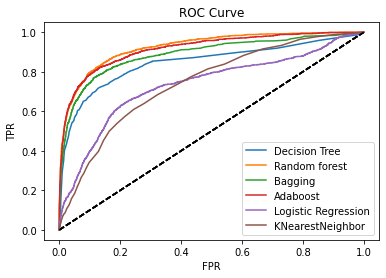

In [ ]:
print("Cross validation ROC Curve")
def ROCEvaluations(df,model,modelname,X_train,y_train):
  print(modelname,":")
  my_model= model.fit(X_train,y_train)
  #cross validation
  score_cv = cross_val_score(my_model, X_train, y_train, cv=5)
  #Classification_report
  pred_y = cross_val_predict(my_model, X_train, y_train, cv=5)
  # print(classification_report(y_train, pred_y))
  df[modelname]= evaluate(modelname,y_train,pred_y)

  #Roc Curve
  yact = y_train.values.ravel()
  proba_y = cross_val_predict(my_model, X_train, yact, cv=5, method='predict_proba')
  proba_y_0 = proba_y[:,0]
  proba_y_0_= [0 if i >= 0.4 else 1 for i in proba_y_0]
  fpr, tpr, thresholds = metrics.roc_curve(yact,proba_y_0,pos_label=0)

  plt.plot(fpr,tpr,label=name)
  plt.title("ROC Curve")
  plt.xlabel("FPR")
  plt.ylabel("TPR")
  plt.plot([0, 1], [0, 1], color='black', ls='--')
  plt.legend(loc='best')

  #Auc
  print(modelname," AUC= ",metrics.auc(fpr, tpr)) #area under the ROC curve

CVResults= pd.DataFrame()
models=[BestDT,BestRF,BestBagging,BestAda,BestLR,BestKNN]
modelnames=["Decision Tree","Random forest","Bagging","Adaboost","Logistic Regression","KNearestNeighbor"]
for model, name in zip(models,modelnames):
  ROCEvaluations(CVResults,model,name,X_train, y_train)

In [ ]:
print("Cross Validation Model Results")
CVResults["Measure"]=["Accuracy", "Precision", "Recall", "F-score"]
CVResults.set_index("Measure",inplace=True)
CVResults

Cross Validation Model Results


Decision Tree  Random forest   Bagging  Adaboost  \
Measure                                                       
Accuracy        0.892236       0.908777  0.903222  0.913591   
Precision       0.884159       0.905407  0.896645  0.908704   
Recall          0.892236       0.908777  0.903222  0.913591   
F-score         0.885631       0.898717  0.895539  0.907970   

           Logistic Regression  KNearestNeighbor  
Measure                                           
Accuracy              0.847920          0.842859  
Precision             0.828406          0.803288  
Recall                0.847920          0.842859  
F-score               0.792323          0.783390

In [ ]:
#CV results are not much better than the basic model results from before
#this is to be expected as CV reduces the risks of overfitting from one train test split
#but is less accurate for an unbalanced dataset due to the random sampling
#Normal CV does not take into account the imbalanced dataset therefore we need to use StratifiedCV

#### Stratified Cross validation
- fixes imbalance problems

In [ ]:
#Get evaluation metrics
def CVevaluate(y_test,y_pred):
  #basic metrics
  accuracy = accuracy_score(y_test, y_pred)
  precision, recall, fscore, support = precision_recall_fscore_support(y_test,y_pred,average="weighted")
  #confusion matrix
  tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
  #Roc Curve metrics and AUC
  fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred,pos_label=1)
  auc=metrics.auc(fpr, tpr)
  #collect the results
  results= [accuracy,precision, recall, fscore, auc, tn, fp, fn, tp, fpr, tpr]
  return results

#prepare the models
models=[BestDT,BestRF,BestBagging,BestAda,BestLR,BestKNN]
modelnames=["Decision Tree","Random forest","Bagging","Adaboost","Logistic Regression","KNearestNeighbor"]
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1) #set folds= 5
StratifiedResults=pd.DataFrame()

#StratifiedKFold
for model, name in zip(models,modelnames):
  foldres={}
  fold_no = 1
  for train_index,test_index in skf.split(X_train, y_train):
    X_train1, X_test1 = X.iloc[train_index], X.iloc[test_index]
    y_train1, y_test1 = y.iloc[train_index], y.iloc[test_index]
    model.fit(X_train1, y_train1)
    y_pred = model.predict(X_test1)
    foldres[fold_no]=CVevaluate(y_test1,y_pred)
    fold_no += 1
  Total= pd.DataFrame.from_dict(foldres)
  StratifiedResults[name]=Total[Total.loc[0,:][Total.loc[0,:] == Total.loc[0,:].median(axis=0)].index[0]]
StratifiedResults["Measure"]=["Accuracy","Precision", "Recall", "F-score","AUC", "tn", "fp", "fn", "tp", "fpr", "tpr"]
StratifiedResults.set_index("Measure",inplace=True)
print("Stratified CV Model Results")
StratifiedResults.head(5)

Stratified CV Model Results


Decision Tree Random forest   Bagging  Adaboost Logistic Regression  \
Measure                                                                         
Accuracy       0.909259      0.923457   0.91358  0.916049            0.873457   
Precision      0.903708      0.919633   0.90759  0.911399            0.862346   
Recall         0.909259      0.923457   0.91358  0.916049            0.873457   
F-score        0.905204      0.917134  0.907122   0.91039            0.847126   
AUC            0.778185      0.779465  0.764898  0.785165            0.630109   

          KNearestNeighbor  
Measure                     
Accuracy          0.852469  
Precision         0.799881  
Recall            0.852469  
F-score           0.799981  
AUC               0.521762

In [ ]:
#Stratified Results are show the best results so far, with most being better than the Basic models results despite the CV
#These are therefore our final improved results taking into account the following problems we identified
#Optimised model parameters, Feature selection, Imbalanced dataset, random sampling in train test split

#### Roc Curve

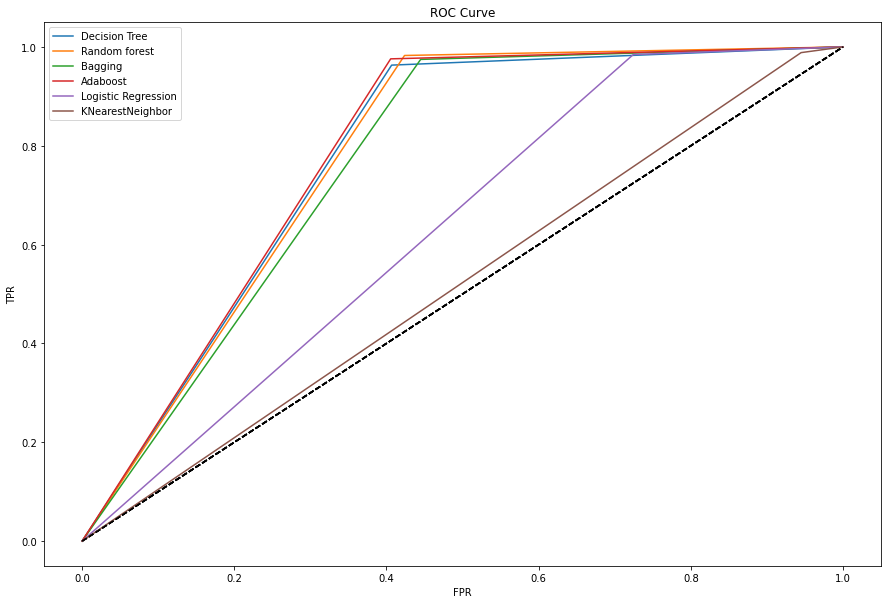

In [ ]:
plt.figure(figsize=(15,10))
for model in StratifiedResults:
  fpr= StratifiedResults[model].iloc[9]
  tpr= StratifiedResults[model].iloc[10]
  plt.plot(fpr,tpr,label=model)
  plt.title("ROC Curve")
  plt.xlabel("FPR")
  plt.ylabel("TPR")
  plt.plot([0, 1], [0, 1], color='black', ls='--')
  plt.legend(loc='best')

#### Confusion matrix

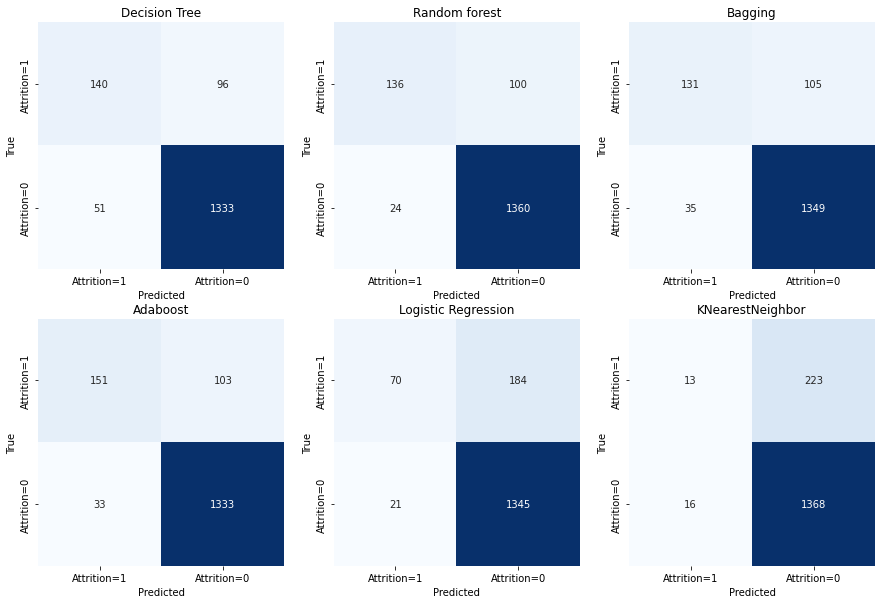

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10))
for model,ax in zip(StratifiedResults.columns,axes.flatten()):
  tn= StratifiedResults[model].iloc[5]
  fp= StratifiedResults[model].iloc[6]
  fn= StratifiedResults[model].iloc[7]
  tp= StratifiedResults[model].iloc[8]
  cm = np.array([[tn, fp], [fn, tp]])
  ax = sns.heatmap(cm, cmap="Blues", annot=True, fmt='d',xticklabels=['Attrition=1', 'Attrition=0'], yticklabels=['Attrition=1', 'Attrition=0'], cbar=False,ax=ax)
  ax.set(title=model, xlabel="Predicted", ylabel="True")
# plt.tight_layout()
plt.show()

## 6 Final Evaluations
Comparing all modeling Results

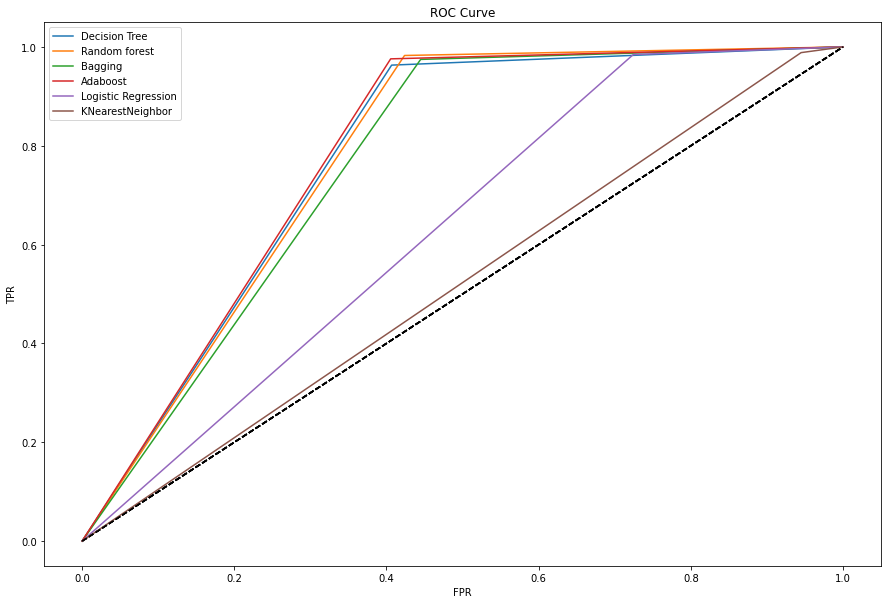

In [ ]:
plt.figure(figsize=(15,10))
for model in StratifiedResults:
  fpr= StratifiedResults[model].iloc[9]
  tpr= StratifiedResults[model].iloc[10]
  plt.plot(fpr,tpr,label=model)
  plt.title("ROC Curve")
  plt.xlabel("FPR")
  plt.ylabel("TPR")
  plt.plot([0, 1], [0, 1], color='black', ls='--')
  plt.legend(loc='best')

In [ ]:
StratifiedResults.head(5)

Decision Tree Random forest   Bagging  Adaboost Logistic Regression  \
Measure                                                                         
Accuracy       0.909259      0.923457   0.91358  0.916049            0.873457   
Precision      0.903708      0.919633   0.90759  0.911399            0.862346   
Recall         0.909259      0.923457   0.91358  0.916049            0.873457   
F-score        0.905204      0.917134  0.907122   0.91039            0.847126   
AUC            0.778185      0.779465  0.764898  0.785165            0.630109   

          KNearestNeighbor  
Measure                     
Accuracy          0.852469  
Precision         0.799881  
Recall            0.852469  
F-score           0.799981  
AUC               0.521762

In [ ]:
#Adaboost has the highest AUC at 0.785165

AdaBoost Results with the unbiased testing set

Adaboost 	accuracy = 0.950, 	precision= 0.948, 	recall= 0.950, 	F-score= 0.948


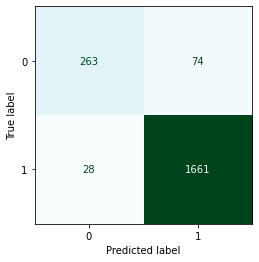

In [ ]:
y_pred = BestAda.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred,cmap="BuGn",colorbar=False)
evaluate("Adaboost",y_test,y_pred)

In [ ]:
# Evaluating our optimised chosen model from the training set improvements on the testing set shows an improved accuracy and recall of 90.3%
# Concluding our testing and evaluations imrpovements as a success

### Appendix

#### Graphing Model Results

In [ ]:
ModelingEvalResults=[basicmodels,undersamplemodels,BalancedResults,CVResults,StratifiedResults]
ModelingEvaluations= ["Basic model Results","Under Sampling Results","Balanced Results","CV Results","StratifiedCV Results"]

Text(0.5, 1.0, 'Adaboost Modeling results')

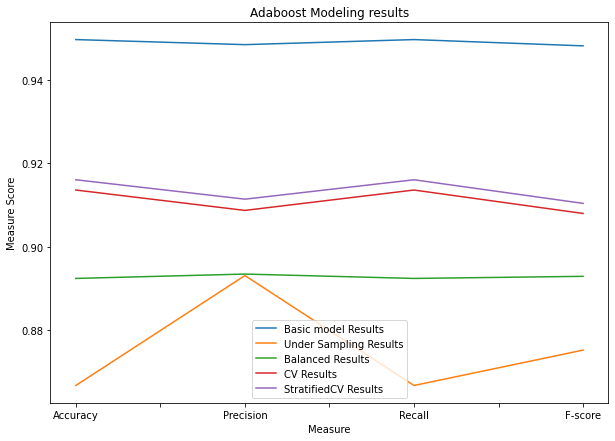

In [ ]:
#Adaboost modeling results show stratified as best for all areas
plt.figure(figsize=(10,7))
for model,name in zip(ModelingEvalResults,ModelingEvaluations):
  model.iloc[:4,3].plot(label=name)
plt.ylabel("Measure Score")
plt.legend(loc='best')
plt.title("Adaboost Modeling results")

Text(0.5, 1.0, 'All Modeling Accuracy results')

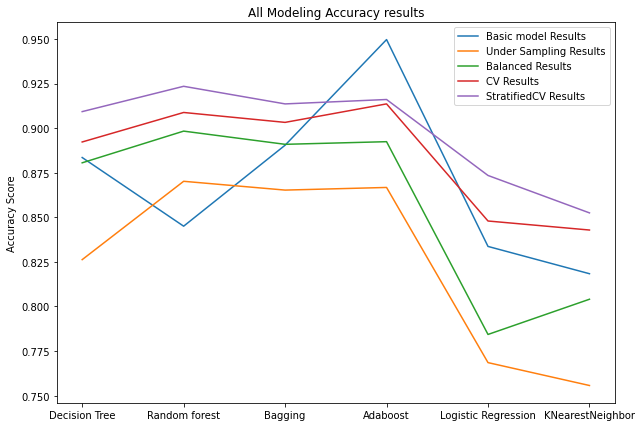

In [ ]:
#for all model types:
plt.figure(figsize=(10,7))
for model,name in zip(ModelingEvalResults,ModelingEvaluations):
  model.iloc[0,:].plot(label=name)
plt.ylabel("Accuracy Score")
plt.legend(loc='best')
plt.title("All Modeling Accuracy results")

Text(0.5, 1.0, 'All Modeling F-score results')

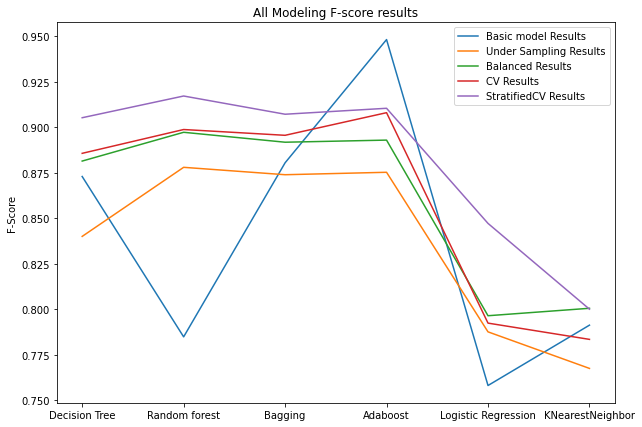

In [ ]:
plt.figure(figsize=(10,7))
for model,name in zip(ModelingEvalResults,ModelingEvaluations):
  model.iloc[3,:].plot(label=name)
plt.ylabel("F-Score")
plt.legend(loc='best')
plt.title("All Modeling F-score results")

Text(0.5, 1.0, 'All Modeling Precision results')

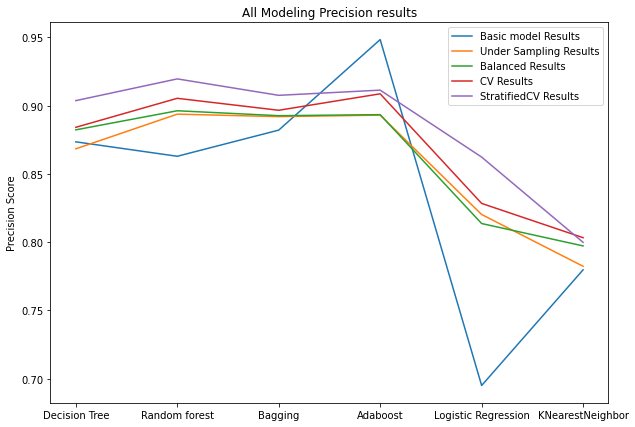

In [ ]:
plt.figure(figsize=(10,7))
for model,name in zip(ModelingEvalResults,ModelingEvaluations):
  model.iloc[1,:].plot(label=name)
plt.ylabel("Precision Score")
plt.legend(loc='best')
plt.title("All Modeling Precision results")

#### Table Model Results

In [ ]:
print("Basic Modeling Results")
basicmodels

Basic Modeling Results


Decision Tree  Random forest   Bagging  Adaboost  \
Measure                                                       
Accuracy        0.883514       0.845015  0.890424  0.885982   
Precision       0.873511       0.862944  0.882103  0.876834   
Recall          0.883514       0.845015  0.890424  0.885982   
F-score         0.872897       0.784778  0.880437  0.873894   

           Logistic Regression  KNearestNeighbor  
Measure                                           
Accuracy              0.833662          0.818361  
Precision             0.694993          0.779746  
Recall                0.833662          0.818361  
F-score               0.758038          0.791205

In [ ]:
print("Undersampling Model Results")
undersamplemodels

Undersampling Model Results


Decision Tree  Random forest   Bagging  Adaboost  \
Measure                                                       
Accuracy        0.826259       0.870188  0.865252  0.866732   
Precision       0.868409       0.893803  0.891978  0.893087   
Recall          0.826259       0.870188  0.865252  0.866732   
F-score         0.839985       0.877943  0.873879  0.875219   

           Logistic Regression  KNearestNeighbor  
Measure                                           
Accuracy              0.768509          0.755676  
Precision             0.820282          0.782345  
Recall                0.768509          0.755676  
F-score               0.787520          0.767434

In [ ]:
print("Balanced Sample Model Results")
BalancedResults

Balanced Sample Model Results


Decision Tree  Random forest   Bagging  Adaboost  \
Measure                                                       
Accuracy        0.880553       0.898322  0.890918  0.892399   
Precision       0.882302       0.896287  0.892665  0.893446   
Recall          0.880553       0.898322  0.890918  0.892399   
F-score         0.881385       0.897196  0.891739  0.892902   

           Logistic Regression  KNearestNeighbor  
Measure                                           
Accuracy              0.784304          0.804047  
Precision             0.813661          0.797271  
Recall                0.784304          0.804047  
F-score               0.796387          0.800476

In [ ]:
print("Cross Validation Model Results")
CVResults

Cross Validation Model Results


Decision Tree  Random forest   Bagging  Adaboost  \
Measure                                                       
Accuracy        0.892236       0.908777  0.903222  0.913591   
Precision       0.884159       0.905407  0.896645  0.908704   
Recall          0.892236       0.908777  0.903222  0.913591   
F-score         0.885631       0.898717  0.895539  0.907970   

           Logistic Regression  KNearestNeighbor  
Measure                                           
Accuracy              0.847920          0.842859  
Precision             0.828406          0.803288  
Recall                0.847920          0.842859  
F-score               0.792323          0.783390

In [ ]:
print("Stratified CV Model Results")
StratifiedResults.head(5)

Stratified CV Model Results


Decision Tree Random forest   Bagging  Adaboost Logistic Regression  \
Measure                                                                         
Accuracy       0.909259      0.923457   0.91358  0.916049            0.873457   
Precision      0.903708      0.919633   0.90759  0.911399            0.862346   
Recall         0.909259      0.923457   0.91358  0.916049            0.873457   
F-score        0.905204      0.917134  0.907122   0.91039            0.847126   
AUC            0.778185      0.779465  0.764898  0.785165            0.630109   

          KNearestNeighbor  
Measure                     
Accuracy          0.852469  
Precision         0.799881  
Recall            0.852469  
F-score           0.799981  
AUC               0.521762